In [1]:
from sklearn import metrics

def sigmoid(X,theta):
    z = np.dot(X,theta.T).astype(float)
    return 1.0/(1+np.exp(-z))

def cost_function(h,y):
    loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
    return loss

def gradient_descent(X,h,y,yl):
    return np.dot((h-y), X)/yl

def sigmoid_2(p):
    s = (L*(p-threshold)).astype(float)
    return 1.0/(1+np.exp(-s))

def cost_function_new(bs,syh,syhy,bs_sy):
    loss = (1+bs)*syhy / ( bs_sy + syh )  # f1_score
    return 1-loss

def gradient_descent_new(p,X,yh,y,bs,syh,syhy,bs_sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -( (1+bs) * (np.dot(y*yp_pz*(bs_sy+syh), X) - np.dot(yp_pz*syhy, X)) ) / ( (bs_sy + syh)**2 )
    
def update_loss(theta,learning_rate,gradient):
    return theta-(learning_rate*gradient)    
    
def predict(X,theta):
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome    
    
def plot_cost_function(cost):
    plt.rcParams["figure.dpi"] = 200
    plt.rcParams['axes.titlesize'] = 20  
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['axes.labelsize'] = 20  
    plt.rcParams['font.size'] = 15
    plt.plot(cost,label="loss",linewidth=3)
    plt.ylim(-0.1,1.1)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title("L={}".format(L))
    plt.legend()
    plt.show()    
       
def plot_predict_classification(X,theta):
    X_0 = X[X['target'] == 0]
    X_1 = X[X['target'] == 1]
    plt.scatter(X_0['comp. 0'], X_0['comp. 1'], color='blue', label = 'label 0(Major)', s=5)
    plt.scatter(X_1['comp. 0'], X_1['comp. 1'], color='red', label = 'label 1(minor)', s=5)
    plt.xlabel('X1',fontweight="bold",fontsize = 15)
    plt.ylabel('X2',fontweight="bold",fontsize = 15)
    x = np.linspace(-5, 7, 100)
    y = -(theta[0] + theta[1]*x)/theta[2]
    plt.plot(x,y,color="green",label="Decision Boundary")
    plt.title("Decision Boundary",fontweight="bold",fontsize = 20)
    plt.grid(True)
    plt.legend()
    plt.show()     
    
def plot_metrics(cost):
    plt.plot(cost,label="loss")
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 20)
    plt.ylabel('Loss',fontweight="bold",fontsize = 20)
    plt.title("L={} & α={} & Cost={}".format(L,threshold,np.round(cost[-1],2)),fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def pca(df_X, df_y):
    pca = PCA(n_components = 2)
    pca.fit(df_X)
    df_pca = pca.transform(df_X)
    df_pca = pd.DataFrame(df_pca, columns = ['comp. 0', 'comp. 1'])
    df_pca['target'] = df_y
    print('variance ratio:', pca.explained_variance_ratio_, 'sum:', sum(pca.explained_variance_ratio_))
    return df_pca

def concat(df_X, df_y):
    df = pd.concat([df_X, df_y], axis=1)
    return df

def concath(df_X, df_y):
    df = pd.concat([df_X, df_y])
    return df
    
def plot(X):
    X_0 = X[X['target'] == -1]
    X_1 = X[X['target'] == 1]
    plt.scatter(X_0['comp. 0'], X_0['comp. 1'], color='blue', label = 'label -1(Major)', s=20)
    plt.scatter(X_1['comp. 0'], X_1['comp. 1'], color='red', label = 'label 1(minor)', s=20)
    plt.xlabel('X1',fontweight="bold",fontsize = 15)
    plt.ylabel('X2',fontweight="bold",fontsize = 15)
    plt.title("PCAed Data",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd
Init_X, Init_y = datasets.make_classification(n_samples=5, n_classes=2, weights=[0.6, 0.4], class_sep=1.2,
                                    n_features=5, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=0)
X = np.array(Init_X)
y = np.array(Init_y)
# change 0 -> -1
y = [-1 if x==0 else x for x in y]

df_pca = pca(X, y)
df_pca

variance ratio: [0.60261677 0.34613665] sum: 0.948753425054844


comp. 0   comp. 1  target
0  3.213362 -0.460647       1
1 -0.374342  2.247191      -1
2  0.457131 -0.174357       1
3 -1.537434 -1.962332      -1
4 -1.758717  0.350145      -1

In [4]:
X_train = df_pca.iloc[:, :2]
y_train = df_pca.iloc[:, 2]

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train

array([[ 3.2133624 , -0.4606471 ],
       [-0.37434237,  2.24719115],
       [ 0.45713115, -0.17435717],
       [-1.5374337 , -1.96233197],
       [-1.75871749,  0.35014508]])

In [6]:
# Initialize intercept with ones (for my code)
intercept_r = np.ones((X_train.shape[0],1))
X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
X_train_a

array([[ 1.        ,  3.2133624 , -0.4606471 ],
       [ 1.        , -0.37434237,  2.24719115],
       [ 1.        ,  0.45713115, -0.17435717],
       [ 1.        , -1.5374337 , -1.96233197],
       [ 1.        , -1.75871749,  0.35014508]])

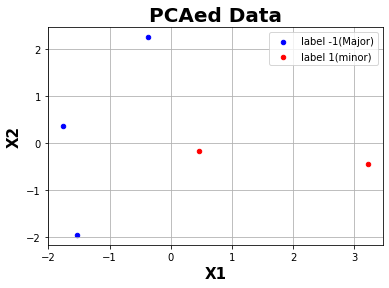

In [7]:
plot(df_pca)

# Analysis on L (Smaller L has more flexibility)
# With 5 samples

In [8]:
def plot_cost_function(cost):
    plt.plot(cost,label="loss")
    plt.ylim([0, 0.4])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show() 

In [9]:
def predict(X,theta):
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome 

In [10]:
y_train = [0 if x==-1 else x for x in y_train]
y_train = np.array(y_train)

p[0]:  [0.5 0.5 0.5 0.5 0.5]
yh[0]:  [0.5 0.5 0.5 0.5 0.5]
cost[0]:  0.5555555555555556
p[1]:  [0.50450544 0.49933607 0.50092969 0.49878189 0.49799001]
yh[1]:  [0.50563157 0.49917009 0.50116211 0.49847737 0.49748753]
cost[1]:  0.5527278422616244
p[2]:  [0.5090051  0.49867006 0.50185637 0.49756205 0.49597877]
yh[2]:  [0.51125447 0.49833758 0.50232045 0.4969526  0.49497363]
cost[2]:  0.5499062095675903
p[3]:  [0.51349694 0.4980021  0.50277977 0.49634086 0.49396693]
yh[3]:  [0.51686477 0.49750265 0.50347466 0.49542621 0.49245924]
cost[3]:  0.54709226016459
p[4]:  [0.51797896 0.49733237 0.50369961 0.49511872 0.49195511]
yh[4]:  [0.52245858 0.49666551 0.50462439 0.4938987  0.48994525]
cost[4]:  0.5442875630046489
p[5]:  [0.52244919 0.49666101 0.50461563 0.49389598 0.48994394]
yh[5]:  [0.52803207 0.49582636 0.50576928 0.49237057 0.48743257]
cost[5]:  0.5414936477889037
p[6]:  [0.52690572 0.49598818 0.50552755 0.49267304 0.48793402]
yh[6]:  [0.53358152 0.49498539 0.506909   0.49084233 0.48492

p[568]:  [0.98149903 0.26273848 0.65639195 0.234986   0.10810071]
yh[568]:  [0.91739706 0.23391997 0.68610234 0.20997601 0.12352155]
cost[568]:  0.23110461023275275
p[569]:  [0.98156711 0.26251605 0.6565299  0.23481171 0.10790628]
yh[569]:  [0.91742285 0.23372073 0.68625086 0.20983149 0.12341634]
cost[569]:  0.23097038346829502
p[570]:  [0.98163487 0.26229405 0.65666773 0.23463774 0.1077124 ]
yh[570]:  [0.91744852 0.23352199 0.68639923 0.2096873  0.12331151]
cost[570]:  0.2308364472894362
p[571]:  [0.98170231 0.26207248 0.65680547 0.23446411 0.10751907]
yh[571]:  [0.91747405 0.23332376 0.68654745 0.20954347 0.12320705]
cost[571]:  0.23070280064421833
p[572]:  [0.98176945 0.26185134 0.65694309 0.23429081 0.10732629]
yh[572]:  [0.91749947 0.23312603 0.68669551 0.20939998 0.12310296]
cost[572]:  0.23056944248612277
p[573]:  [0.98183628 0.26163063 0.65708062 0.23411783 0.10713405]
yh[573]:  [0.91752476 0.23292879 0.68684343 0.20925684 0.12299923]
cost[573]:  0.2304363717740332
p[574]:  [0.

cost[1062]:  0.1872629917099885
p[1063]:  [0.99589705 0.18870148 0.71404716 0.17528872 0.05267394]
yh[1063]:  [0.92269109 0.17415051 0.74464176 0.16471498 0.09650896]
cost[1063]:  0.1872036081761227
p[1064]:  [0.99590749 0.18860095 0.71414513 0.17520389 0.05261141]
yh[1064]:  [0.92269481 0.17407823 0.74473489 0.16465663 0.09648171]
cost[1064]:  0.18714430208084853
p[1065]:  [0.99591789 0.18850056 0.71424304 0.17511916 0.052549  ]
yh[1065]:  [0.92269852 0.17400607 0.74482794 0.16459837 0.09645451]
cost[1065]:  0.1870850732670144
p[1066]:  [0.99592825 0.18840029 0.71434088 0.17503452 0.0524867 ]
yh[1066]:  [0.92270222 0.17393403 0.74492091 0.16454019 0.09642736]
cost[1066]:  0.18702592157792108
p[1067]:  [0.99593859 0.18830016 0.71443865 0.17494999 0.05242452]
yh[1067]:  [0.9227059  0.17386211 0.74501379 0.16448209 0.09640028]
cost[1067]:  0.18696684685732035
p[1068]:  [0.99594889 0.18820015 0.71453636 0.17486555 0.05236245]
yh[1068]:  [0.92270957 0.1737903  0.74510659 0.16442408 0.09637

p[1552]:  [0.99861789 0.15117057 0.75509292 0.14268914 0.03189459]
yh[1552]:  [0.92365594 0.14878693 0.78167676 0.1434957  0.08782168]
cost[1552]:  0.16516510020405795
p[1553]:  [0.99862059 0.15111165 0.75516449 0.1426365  0.03186614]
yh[1553]:  [0.92365689 0.14874963 0.78173783 0.14346335 0.08781029]
cost[1553]:  0.16513084915198095
p[1554]:  [0.99862328 0.15105278 0.75523603 0.14258391 0.03183772]
yh[1554]:  [0.92365784 0.14871236 0.78179885 0.14343104 0.08779891]
cost[1554]:  0.16509663156592358
p[1555]:  [0.99862597 0.15099396 0.75530752 0.14253136 0.03180935]
yh[1555]:  [0.92365879 0.14867514 0.78185982 0.14339876 0.08778755]
cost[1555]:  0.16506244739676368
p[1556]:  [0.99862865 0.15093521 0.75537897 0.14247886 0.03178101]
yh[1556]:  [0.92365973 0.14863795 0.78192075 0.14336652 0.0877762 ]
cost[1556]:  0.1650282965954769
p[1557]:  [0.99863132 0.1508765  0.75545037 0.14242639 0.03175272]
yh[1557]:  [0.92366068 0.14860081 0.78198162 0.14333431 0.08776487]
cost[1557]:  0.16499417911

p[2042]:  [0.99941527 0.12753276 0.78554265 0.12123597 0.02156859]
yh[2042]:  [0.92393661 0.13443098 0.80654476 0.13080951 0.08377272]
cost[2042]:  0.1516197247668576
p[2043]:  [0.9994162  0.12749315 0.78559649 0.12119948 0.02155313]
yh[2043]:  [0.92393693 0.13440794 0.80658677 0.13078877 0.08376679]
cost[2043]:  0.15159743519553082
p[2044]:  [0.99941712 0.12745356 0.78565031 0.12116302 0.02153769]
yh[2044]:  [0.92393726 0.13438491 0.80662874 0.13076805 0.08376086]
cost[2044]:  0.1515751632102772
p[2045]:  [0.99941804 0.127414   0.7857041  0.12112659 0.02152226]
yh[2045]:  [0.92393758 0.1343619  0.80667069 0.13074734 0.08375494]
cost[2045]:  0.15155290879033734
p[2046]:  [0.99941896 0.12737447 0.78575786 0.12109018 0.02150685]
yh[2046]:  [0.9239379  0.13433891 0.8067126  0.13072665 0.08374903]
cost[2046]:  0.15153067191498515
p[2047]:  [0.99941987 0.12733496 0.78581159 0.12105379 0.02149146]
yh[2047]:  [0.92393822 0.13431594 0.80675449 0.13070598 0.08374312]
cost[2047]:  0.151508452563

p[2553]:  [0.99972017 0.11036965 0.80967898 0.10528829 0.01544878]
yh[2553]:  [0.92404368 0.12475503 0.82468179 0.12200717 0.08145381]
cost[2553]:  0.14213854961661776
p[2554]:  [0.99972054 0.11034113 0.80972039 0.10526157 0.01543957]
yh[2554]:  [0.92404381 0.12473946 0.82471172 0.12199286 0.08145036]
cost[2554]:  0.1421231163449469
p[2555]:  [0.99972091 0.11031262 0.80976177 0.10523486 0.01543037]
yh[2555]:  [0.92404394 0.1247239  0.82474162 0.12197856 0.08144692]
cost[2555]:  0.1421076932094173
p[2556]:  [0.99972128 0.11028413 0.80980313 0.10520817 0.01542117]
yh[2556]:  [0.92404406 0.12470835 0.82477152 0.12196427 0.08144348]
cost[2556]:  0.14209228020002906
p[2557]:  [0.99972164 0.11025565 0.80984447 0.10518149 0.01541199]
yh[2557]:  [0.92404419 0.12469281 0.82480139 0.12194999 0.08144005]
cost[2557]:  0.14207687730679575
p[2558]:  [0.99972201 0.1102272  0.80988579 0.10515483 0.01540281]
yh[2558]:  [0.92404432 0.12467728 0.82483124 0.12193571 0.08143661]
cost[2558]:  0.142061484519

cost[3057]:  0.13546275743676062
p[3058]:  [0.99984889 0.09778827 0.82832229 0.09344407 0.01168959]
yh[3058]:  [0.92408883 0.11804671 0.83775409 0.115804   0.08005853]
cost[3058]:  0.13545139523124006
p[3059]:  [0.99984906 0.09776649 0.8283552  0.09342347 0.01168361]
yh[3059]:  [0.92408889 0.11803538 0.83777646 0.11579346 0.08005633]
cost[3059]:  0.13544003941724303
p[3060]:  [0.99984923 0.09774472 0.8283881  0.09340289 0.01167763]
yh[3060]:  [0.92408895 0.11802405 0.83779881 0.11578292 0.08005412]
cost[3060]:  0.13542868998934365
p[3061]:  [0.9998494  0.09772297 0.82842098 0.09338231 0.01167165]
yh[3061]:  [0.92408901 0.11801273 0.83782115 0.11577239 0.08005192]
cost[3061]:  0.1354173469421216
p[3062]:  [0.99984957 0.09770122 0.82845385 0.09336175 0.01166568]
yh[3062]:  [0.92408907 0.11800141 0.83784348 0.11576186 0.08004973]
cost[3062]:  0.1354060102701633
p[3063]:  [0.99984974 0.09767949 0.8284867  0.09334119 0.01165971]
yh[3063]:  [0.92408913 0.1179901  0.83786579 0.11575134 0.0800

cost[3564]:  0.13041938016800325
p[3565]:  [0.99991162 0.08796275 0.84338137 0.08412538 0.00916853]
yh[3565]:  [0.92411083 0.11302716 0.84772999 0.11111787 0.07913506]
cost[3565]:  0.13041067452958244
p[3566]:  [0.9999117  0.0879455  0.84340817 0.08410898 0.00916441]
yh[3566]:  [0.92411086 0.11301851 0.84774729 0.11110977 0.07913356]
cost[3566]:  0.13040197316352775
p[3567]:  [0.99991179 0.08792825 0.84343497 0.08409258 0.0091603 ]
yh[3567]:  [0.9241109  0.11300986 0.84776458 0.11110167 0.07913206]
cost[3567]:  0.13039327606666262
p[3568]:  [0.99991188 0.08791101 0.84346175 0.08407619 0.00915619]
yh[3568]:  [0.92411093 0.11300123 0.84778186 0.11109358 0.07913057]
cost[3568]:  0.1303845832358126
p[3569]:  [0.99991197 0.08789378 0.84348852 0.0840598  0.00915209]
yh[3569]:  [0.92411096 0.11299259 0.84779914 0.11108549 0.07912907]
cost[3569]:  0.13037589466780763
p[3570]:  [0.99991205 0.08787656 0.84351529 0.08404342 0.00914798]
yh[3570]:  [0.92411099 0.11298396 0.8478164  0.1110774  0.079

cost[4049]:  0.12664495808145348
p[4050]:  [0.99994387 0.0803786  0.85528262 0.07690101 0.00746256]
yh[4050]:  [0.92412214 0.10928095 0.85525339 0.10759989 0.0785157 ]
cost[4050]:  0.12663800334324937
p[4051]:  [0.99994392 0.08036443 0.85530508 0.07688748 0.00745956]
yh[4051]:  [0.92412216 0.10927405 0.85526729 0.1075934  0.07851461]
cost[4051]:  0.1266310516435325
p[4052]:  [0.99994397 0.08035026 0.85532754 0.07687396 0.00745657]
yh[4052]:  [0.92412218 0.10926715 0.85528119 0.10758691 0.07851353]
cost[4052]:  0.12662410298028504
p[4053]:  [0.99994402 0.08033609 0.85534999 0.07686045 0.00745358]
yh[4053]:  [0.9241222  0.10926026 0.85529508 0.10758042 0.07851244]
cost[4053]:  0.1266171573514916
p[4054]:  [0.99994407 0.08032193 0.85537242 0.07684694 0.00745058]
yh[4054]:  [0.92412221 0.10925337 0.85530897 0.10757393 0.07851136]
cost[4054]:  0.1266102147551379
p[4055]:  [0.99994412 0.08030778 0.85539486 0.07683344 0.00744759]
yh[4055]:  [0.92412223 0.10924648 0.85532285 0.10756745 0.07851

p[4548]:  [0.99996307 0.07392988 0.86558414 0.07074179 0.00617071]
yh[4548]:  [0.92412887 0.10618171 0.86151384 0.10467832 0.07804963]
cost[4548]:  0.12351466134250522
p[4549]:  [0.9999631  0.07391805 0.86560319 0.07073048 0.00616848]
yh[4549]:  [0.92412889 0.1061761  0.8615252  0.10467302 0.07804883]
cost[4549]:  0.1235090044644015
p[4550]:  [0.99996313 0.07390622 0.86562223 0.07071918 0.00616624]
yh[4550]:  [0.9241289  0.10617049 0.86153656 0.10466772 0.07804802]
cost[4550]:  0.12350334980524769
p[4551]:  [0.99996316 0.0738944  0.86564127 0.07070788 0.006164  ]
yh[4551]:  [0.92412891 0.10616488 0.86154791 0.10466243 0.07804722]
cost[4551]:  0.1234976973637183
p[4552]:  [0.99996319 0.07388258 0.8656603  0.07069658 0.00616177]
yh[4552]:  [0.92412892 0.10615927 0.86155926 0.10465713 0.07804641]
cost[4552]:  0.12349204713848771
p[4553]:  [0.99996322 0.07387077 0.86567932 0.07068528 0.00615953]
yh[4553]:  [0.92412893 0.10615367 0.86157061 0.10465184 0.07804561]
cost[4553]:  0.123486399128

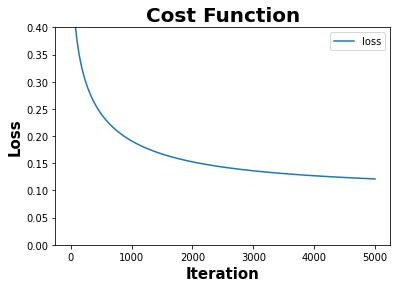

theta:  [ 0.3986826   3.04103589 -0.82901274]


In [11]:
# My approach
##################################################
theta = np.zeros(X_train_a.shape[1])
# theta = np.array([0.1924853 , 0.74742297, 0.37349794])
# theta = a
##################################################

# Experiments
num_iter = 5000
threshold = 0.5      # p > threshold
beta = 1             # F1? F2?
##################################################
L = 5               # very important
##################################################
cost = []
lr = 0.01

bs = beta**2
sy = np.sum(y_train)
bs_sy = bs*sy

for i in range(num_iter):
    p = sigmoid(X_train_a,theta)
    print("p[{}]: ".format(i), p)
    yh = sigmoid_2(p)                                          # Approximation (probablility -> label)
    print("yh[{}]: ".format(i), yh)
    syh = np.sum(yh)
    syhy = np.dot(yh,y_train)
    cost.append(cost_function_new(bs,syh,syhy,bs_sy))                 # F1-Score
    print("cost[{}]: ".format(i), cost_function_new(bs,syh,syhy,bs_sy))
    gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)      # Derivative of F1-Score
#     print("gradient[{}]: ".format(i), gradient)
    theta = update_loss(theta,lr,gradient)
#     print("theta[{}]: ".format(i), theta)
#     if cost[-1] <0.1: 
#         print(i, cost[-3:-1])
#         break
#     else: continue
    
outcome_r = predict(X_train_a,theta)
print(outcome_r)
print(y_train)

plot_cost_function(cost)

print("theta: ", theta)

p[0]:  [0.97708351 0.94648782 0.7829216  0.07587461 0.39925448]
yh[0]:  [0.91570854 0.90312497 0.80449173 0.1071081  0.37666507]
cost[0]:  0.32634927628067667
p[1]:  [0.97715286 0.94644527 0.78298893 0.07579031 0.39881521]
yh[1]:  [0.9157353  0.90310635 0.80454468 0.10706779 0.37614953]
cost[1]:  0.3262527925222811
p[2]:  [0.97722195 0.9464027  0.7830562  0.07570618 0.39837645]
yh[2]:  [0.91576195 0.90308772 0.80459756 0.10702759 0.37563488]
cost[2]:  0.32615646228125994
p[3]:  [0.97729078 0.94636012 0.7831234  0.07562224 0.3979382 ]
yh[3]:  [0.91578849 0.90306909 0.80465038 0.10698748 0.3751211 ]
cost[3]:  0.3260602855944711
p[4]:  [0.97735935 0.94631751 0.78319053 0.07553847 0.39750047]
yh[4]:  [0.91581493 0.90305044 0.80470314 0.10694747 0.3746082 ]
cost[4]:  0.3259642624965001
p[5]:  [0.97742766 0.9462749  0.7832576  0.07545489 0.39706324]
yh[5]:  [0.91584126 0.90303178 0.80475583 0.10690756 0.37409618]
cost[5]:  0.3258683930196624
p[6]:  [0.97749572 0.94623226 0.7833246  0.0753714

p[566]:  [0.99419337 0.92164712 0.81372698 0.04869917 0.2296095 ]
yh[566]:  [0.92208126 0.89170106 0.82758891 0.09478991 0.20555135]
cost[566]:  0.291876985507873
p[567]:  [0.99420449 0.9216025  0.81377187 0.0486749  0.22942055]
yh[567]:  [0.92208525 0.89167951 0.82762094 0.09477949 0.20539711]
cost[567]:  0.2918408871055521
p[568]:  [0.99421558 0.92155786 0.81381674 0.04865069 0.22923187]
yh[568]:  [0.92208924 0.89165796 0.82765294 0.09476911 0.20524318]
cost[568]:  0.29180484147035
p[569]:  [0.99422663 0.92151323 0.81386158 0.04862652 0.22904345]
yh[569]:  [0.92209321 0.89163639 0.82768492 0.09475874 0.20508955]
cost[569]:  0.29176884846915885
p[570]:  [0.99423766 0.92146858 0.81390639 0.0486024  0.2288553 ]
yh[570]:  [0.92209717 0.89161482 0.82771687 0.0947484  0.20493623]
cost[570]:  0.29173290796922224
p[571]:  [0.99424867 0.92142393 0.81395118 0.04857834 0.22866742]
yh[571]:  [0.92210112 0.89159325 0.8277488  0.09473808 0.20478321]
cost[571]:  0.29169701983813523
p[572]:  [0.9942

p[1043]:  [0.99736169 0.89872271 0.83244221 0.04133066 0.16222639]
yh[1043]:  [0.92321186 0.88012491 0.84053459 0.09167549 0.15592476]
cost[1043]:  0.2788483367881175
p[1044]:  [0.9973655  0.89866919 0.83247635 0.0413218  0.16212027]
yh[1044]:  [0.9232132  0.88009667 0.84055747 0.0916718  0.15585494]
cost[1044]:  0.2788269997466445
p[1045]:  [0.9973693  0.89861564 0.83251048 0.04131295 0.16201424]
yh[1045]:  [0.92321455 0.88006841 0.84058033 0.09166811 0.15578521]
cost[1045]:  0.2788056787529527
p[1046]:  [0.99737309 0.89856205 0.83254459 0.04130413 0.16190833]
yh[1046]:  [0.92321589 0.88004013 0.84060319 0.09166444 0.15571557]
cost[1046]:  0.27878437376429965
p[1047]:  [0.99737687 0.89850843 0.83257867 0.04129533 0.16180252]
yh[1047]:  [0.92321723 0.88001183 0.84062602 0.09166077 0.15564603]
cost[1047]:  0.27876308473801836
p[1048]:  [0.99738065 0.89845478 0.83261274 0.04128654 0.16169681]
yh[1048]:  [0.92321857 0.8799835  0.84064884 0.09165712 0.15557658]
cost[1048]:  0.2787418116315

p[1558]:  [0.99864876 0.86490939 0.84768702 0.03912787 0.11813744]
yh[1558]:  [0.92366683 0.86111083 0.85048818 0.09076246 0.12905807]
cost[1558]:  0.2691561499760551
p[1559]:  [0.99865036 0.86482664 0.84771236 0.03912777 0.11806701]
yh[1559]:  [0.92366739 0.86106134 0.8505043  0.09076241 0.1290185 ]
cost[1559]:  0.2691383746013164
p[1560]:  [0.99865196 0.86474378 0.84773769 0.03912767 0.11799662]
yh[1560]:  [0.92366795 0.86101177 0.8505204  0.09076238 0.12897895]
cost[1560]:  0.2691205975152937
p[1561]:  [0.99865356 0.86466084 0.84776301 0.0391276  0.11792627]
yh[1561]:  [0.92366852 0.86096213 0.85053649 0.09076234 0.12893944]
cost[1561]:  0.26910281868137287
p[1562]:  [0.99865515 0.86457781 0.84778831 0.03912754 0.11785597]
yh[1562]:  [0.92366908 0.86091243 0.85055257 0.09076232 0.12889997]
cost[1562]:  0.2690850380628861
p[1563]:  [0.99865674 0.86449468 0.84781359 0.03912749 0.1177857 ]
yh[1563]:  [0.92366964 0.86086265 0.85056864 0.0907623  0.12886053]
cost[1563]:  0.26906725562311

cost[2067]:  0.2587984614523823
p[2068]:  [0.99923853 0.80464169 0.85856456 0.04143599 0.08603009]
yh[2068]:  [0.92387448 0.82101046 0.85727301 0.09171935 0.11206201]
cost[2068]:  0.2587723738389951
p[2069]:  [0.99923936 0.80446971 0.85858164 0.04144636 0.0859716 ]
yh[2069]:  [0.92387477 0.82088406 0.85728346 0.09172367 0.11203291]
cost[2069]:  0.2587462447706854
p[2070]:  [0.99924019 0.80429741 0.85859869 0.04145676 0.08591313]
yh[2070]:  [0.92387506 0.82075735 0.85729389 0.091728   0.11200383]
cost[2070]:  0.2587200740741942
p[2071]:  [0.99924102 0.8041248  0.85861573 0.04146719 0.08585465]
yh[2071]:  [0.92387535 0.82063035 0.85730431 0.09173235 0.11197475]
cost[2071]:  0.25869386157549457
p[2072]:  [0.99924185 0.80395186 0.85863275 0.04147766 0.08579619]
yh[2072]:  [0.92387565 0.82050304 0.85731473 0.09173671 0.11194569]
cost[2072]:  0.2586676070997892
p[2073]:  [0.99924268 0.80377861 0.85864975 0.04148815 0.08573772]
yh[2073]:  [0.92387594 0.82037542 0.85732512 0.09174108 0.1119166

p[2560]:  [0.99956674 0.65064813 0.8640591  0.05282641 0.05626035]
yh[2560]:  [0.92398981 0.67988441 0.86060158 0.09657545 0.0980839 ]
cost[2560]:  0.23393877427221332
p[2561]:  [0.99956729 0.65009577 0.8640622  0.05287122 0.05619443]
yh[2561]:  [0.92399001 0.67928303 0.86060344 0.09659501 0.09805475]
cost[2561]:  0.23383775883780467
p[2562]:  [0.99956784 0.64954192 0.86406526 0.05291618 0.05612847]
yh[2562]:  [0.9239902  0.67867943 0.86060527 0.09661463 0.09802559]
cost[2562]:  0.23373636879995996
p[2563]:  [0.9995684  0.64898658 0.86406827 0.05296128 0.05606249]
yh[2563]:  [0.9239904  0.67807361 0.86060708 0.09663431 0.09799642]
cost[2563]:  0.23363460286236282
p[2564]:  [0.99956895 0.64842975 0.86407124 0.05300652 0.05599648]
yh[2564]:  [0.92399059 0.67746555 0.86060886 0.09665406 0.09796725]
cost[2564]:  0.23353245973281755
p[2565]:  [0.9995695  0.64787142 0.86407416 0.05305191 0.05593044]
yh[2565]:  [0.92399078 0.67685526 0.86061061 0.09667387 0.09793807]
cost[2565]:  0.2334299381

cost[3069]:  0.1601860205480462
p[3070]:  [0.99978915 0.29660331 0.86287147 0.08683263 0.02724158]
yh[3070]:  [0.92406788 0.2656154  0.85988767 0.11246191 0.08597573]
cost[3070]:  0.16009795364346213
p[3071]:  [0.99978943 0.29613742 0.86287302 0.08688319 0.02720764]
yh[3071]:  [0.92406798 0.26516126 0.85988861 0.11248715 0.08596239]
cost[3071]:  0.16001022510113438
p[3072]:  [0.99978971 0.29567294 0.86287461 0.08693358 0.0271738 ]
yh[3072]:  [0.92406808 0.26470899 0.85988956 0.1125123  0.0859491 ]
cost[3072]:  0.15992283353985715
p[3073]:  [0.99978999 0.29520987 0.86287622 0.0869838  0.02714003]
yh[3073]:  [0.92406818 0.26425858 0.85989054 0.11253738 0.08593584]
cost[3073]:  0.159835777579166
p[3074]:  [0.99979027 0.2947482  0.86287788 0.08703385 0.02710635]
yh[3074]:  [0.92406827 0.26381002 0.85989153 0.11256237 0.08592261]
cost[3074]:  0.15974905583944443
p[3075]:  [0.99979055 0.29428793 0.86287956 0.08708373 0.02707276]
yh[3075]:  [0.92406837 0.26336331 0.85989255 0.11258729 0.08590

cost[3558]:  0.1388703487254216
p[3559]:  [0.99988209 0.17231274 0.86617827 0.09618798 0.01690211]
yh[3559]:  [0.92410048 0.16267795 0.86186788 0.11721621 0.08199915]
cost[3559]:  0.13884864055190071
p[3560]:  [0.99988221 0.17217975 0.86618818 0.09618619 0.01688875]
yh[3560]:  [0.92410052 0.1625874  0.86187378 0.11721529 0.08199412]
cost[3560]:  0.13882697251940412
p[3561]:  [0.99988234 0.17204703 0.86619809 0.09618436 0.0168754 ]
yh[3561]:  [0.92410057 0.16249706 0.86187968 0.11721434 0.0819891 ]
cost[3561]:  0.13880534448587056
p[3562]:  [0.99988247 0.17191458 0.86620802 0.09618247 0.01686208]
yh[3562]:  [0.92410061 0.16240695 0.86188558 0.11721336 0.08198408]
cost[3562]:  0.13878375630990447
p[3563]:  [0.99988259 0.17178238 0.86621795 0.09618053 0.01684877]
yh[3563]:  [0.92410066 0.16231706 0.86189149 0.11721236 0.08197908]
cost[3563]:  0.13876220785077265
p[3564]:  [0.99988272 0.17165045 0.86622788 0.09617855 0.01683548]
yh[3564]:  [0.9241007  0.16222739 0.86189741 0.11721133 0.081

p[4035]:  [0.99992707 0.12921014 0.87140958 0.09175268 0.01214367]
yh[4035]:  [0.92411625 0.13540987 0.86495249 0.11494088 0.0802259 ]
cost[4035]:  0.131445272435474
p[4036]:  [0.99992714 0.1291482  0.87142122 0.09173897 0.01213618]
yh[4036]:  [0.92411628 0.13537362 0.86495928 0.1149339  0.08022314]
cost[4036]:  0.1314337019907017
p[4037]:  [0.99992721 0.12908634 0.87143286 0.09172524 0.0121287 ]
yh[4037]:  [0.9241163  0.13533742 0.86496608 0.11492692 0.08022038]
cost[4037]:  0.13142214254764184
p[4038]:  [0.99992728 0.12902456 0.8714445  0.0917115  0.01212123]
yh[4038]:  [0.92411633 0.13530128 0.86497288 0.11491993 0.08021762]
cost[4038]:  0.13141059408397826
p[4039]:  [0.99992735 0.12896287 0.87145614 0.09169776 0.01211376]
yh[4039]:  [0.92411635 0.13526519 0.86497968 0.11491294 0.08021487]
cost[4039]:  0.13139905657746387
p[4040]:  [0.99992742 0.12890125 0.87146778 0.09168401 0.0121063 ]
yh[4040]:  [0.92411637 0.13522916 0.86498648 0.11490595 0.08021212]
cost[4040]:  0.1313875300059

cost[4530]:  0.1267383402280644
p[4531]:  [0.9999532  0.10581896 0.87725398 0.08442699 0.00919562]
yh[4531]:  [0.92412541 0.12229169 0.86832964 0.11126691 0.07914493]
cost[4531]:  0.12673042074315333
p[4532]:  [0.99995324 0.10578284 0.87726576 0.08441201 0.00919091]
yh[4532]:  [0.92412543 0.12227231 0.86833638 0.1112595  0.07914322]
cost[4532]:  0.12672250624753834
p[4533]:  [0.99995328 0.10574676 0.87727754 0.08439703 0.00918621]
yh[4533]:  [0.92412544 0.12225295 0.86834311 0.1112521  0.0791415 ]
cost[4533]:  0.12671459673491803
p[4534]:  [0.99995332 0.10571071 0.87728931 0.08438206 0.00918151]
yh[4534]:  [0.92412546 0.12223361 0.86834984 0.11124469 0.07913979]
cost[4534]:  0.1267066921990042
p[4535]:  [0.99995336 0.1056747  0.87730108 0.08436708 0.00917682]
yh[4535]:  [0.92412547 0.12221429 0.86835657 0.11123729 0.07913808]
cost[4535]:  0.12669879263352202
p[4536]:  [0.9999534  0.10563872 0.87731286 0.08435211 0.00917213]
yh[4536]:  [0.92412548 0.12219499 0.8683633  0.11122989 0.0791

p[4883]:  [0.99996488 0.09484295 0.88135387 0.07929595 0.00775427]
yh[4883]:  [0.92412951 0.11652211 0.87065577 0.10875514 0.07862129]
cost[4883]:  0.12421384133404834
p[4884]:  [0.99996491 0.09481598 0.88136536 0.07928189 0.00775071]
yh[4884]:  [0.92412952 0.11650823 0.87066224 0.10874833 0.07862   ]
cost[4884]:  0.12420736725230064
p[4885]:  [0.99996494 0.09478904 0.88137684 0.07926783 0.00774716]
yh[4885]:  [0.92412953 0.11649436 0.8706687  0.10874151 0.07861871]
cost[4885]:  0.12420089653870425
p[4886]:  [0.99996497 0.09476211 0.88138833 0.07925377 0.00774361]
yh[4886]:  [0.92412954 0.1164805  0.87067517 0.1087347  0.07861743]
cost[4886]:  0.12419442918994039
p[4887]:  [0.99996499 0.0947352  0.88139981 0.07923972 0.00774006]
yh[4887]:  [0.92412955 0.11646666 0.87068163 0.10872789 0.07861614]
cost[4887]:  0.12418796520269648
p[4888]:  [0.99996502 0.09470831 0.88141129 0.07922566 0.00773651]
yh[4888]:  [0.92412956 0.11645282 0.87068809 0.10872108 0.07861486]
cost[4888]:  0.1241815045

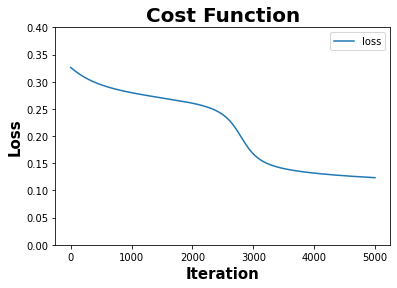

theta:  [ 0.53901203  2.94220108 -0.76951579]


In [12]:
# My approach
##################################################
theta = np.ones(X_train_a.shape[1])
# theta = np.array([0.1924853 , 0.74742297, 0.37349794])
# theta = a
##################################################

# Experiments
num_iter = 5000
threshold = 0.5      # p > threshold
beta = 1             # F1? F2?
##################################################
L = 5               # very important
##################################################
cost = []
lr = 0.01

bs = beta**2
sy = np.sum(y_train)
bs_sy = bs*sy

for i in range(num_iter):
    p = sigmoid(X_train_a,theta)
    print("p[{}]: ".format(i), p)
    yh = sigmoid_2(p)                                          # Approximation (probablility -> label)
    print("yh[{}]: ".format(i), yh)
    syh = np.sum(yh)
    syhy = np.dot(yh,y_train)
    cost.append(cost_function_new(bs,syh,syhy,bs_sy))                 # F1-Score
    print("cost[{}]: ".format(i), cost_function_new(bs,syh,syhy,bs_sy))
    gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)      # Derivative of F1-Score
#     print("gradient[{}]: ".format(i), gradient)
    theta = update_loss(theta,lr,gradient)
#     print("theta[{}]: ".format(i), theta)
#     if cost[-1] <0.1: 
#         print(i, cost[-3:-1])
#         break
#     else: continue
    
outcome_r = predict(X_train_a,theta)
print(outcome_r)
print(y_train)

plot_cost_function(cost)

print("theta: ", theta)

In [44]:
# plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 15

plt.plot(cost,label="loss", linewidth = 3)
plt.ylim([0, 0.4])
plt.xlabel('Iteration',fontsize = 20)
plt.ylabel('Loss',fontsize = 20)
plt.title("L=5",fontsize = 20)
# plt.legend()
plt.show() 

p[0]:  [0.97708351 0.94648782 0.7829216  0.07587461 0.39925448]
yh[0]:  [0.99159789 0.98862479 0.94423433 0.01418542 0.26747817]
cost[0]:  0.25632447795659863
p[1]:  [0.97717036 0.94640858 0.78295151 0.07573598 0.39856279]
yh[1]:  [0.99160512 0.98861587 0.94425008 0.01416604 0.2661251 ]
cost[1]:  0.2561215580249889
p[2]:  [0.97725664 0.9463295  0.78298145 0.07559807 0.39787376]
yh[2]:  [0.9916123  0.98860697 0.94426584 0.0141468  0.26478157]
cost[2]:  0.255919926025736
p[3]:  [0.97734236 0.94625056 0.78301142 0.07546087 0.39718738]
yh[3]:  [0.99161943 0.98859807 0.94428161 0.01412767 0.26344755]
cost[3]:  0.25571957795834266
p[4]:  [0.97742752 0.94617178 0.78304141 0.07532439 0.39650366]
yh[4]:  [0.99162651 0.98858919 0.94429739 0.01410868 0.26212297]
cost[4]:  0.2555205096689177
p[5]:  [0.97751212 0.94609315 0.78307144 0.07518862 0.39582258]
yh[5]:  [0.99163353 0.98858032 0.94431318 0.0140898  0.26080781]
cost[5]:  0.255322716855243
p[6]:  [0.97759618 0.94601468 0.7831015  0.07505355 

cost[150]:  0.2369567717534109
p[151]:  [0.98562838 0.93635907 0.78769592 0.06130497 0.32095498]
yh[151]:  [0.99228071 0.98742749 0.94669562 0.01228579 0.14301754]
cost[151]:  0.23687993975160104
p[152]:  [0.98566418 0.93630343 0.78772863 0.06123991 0.32057701]
yh[152]:  [0.99228345 0.98742058 0.94671213 0.0122779  0.1425549 ]
cost[152]:  0.23680355190931623
p[153]:  [0.9856998  0.93624791 0.78776134 0.06117515 0.32020042]
yh[153]:  [0.99228618 0.98741369 0.94672863 0.01227004 0.14209521]
cost[153]:  0.236727604664263
p[154]:  [0.98573524 0.93619252 0.78779406 0.06111067 0.31982522]
yh[154]:  [0.99228889 0.9874068  0.94674513 0.01226223 0.14163844]
cost[154]:  0.2366520944857734
p[155]:  [0.98577051 0.93613726 0.78782679 0.06104648 0.3194514 ]
yh[155]:  [0.99229159 0.98739993 0.94676162 0.01225446 0.14118457]
cost[155]:  0.2365770178745662
p[156]:  [0.9858056  0.93608212 0.78785952 0.06098257 0.31907895]
yh[156]:  [0.99229427 0.98739307 0.94677812 0.01224673 0.14073357]
cost[156]:  0.2

cost[525]:  0.22316247786113064
p[526]:  [0.99262855 0.9211908  0.79965491 0.04801412 0.23588361]
yh[526]:  [0.99279884 0.9853983  0.95241798 0.01077323 0.06653571]
cost[526]:  0.2231444433006421
p[527]:  [0.99263839 0.92115975 0.79968497 0.04799479 0.23574364]
yh[527]:  [0.99279954 0.98539383 0.95243161 0.01077117 0.06644883]
cost[527]:  0.22312645398952347
p[528]:  [0.9926482  0.92112873 0.79971503 0.0479755  0.23560394]
yh[528]:  [0.99280024 0.98538937 0.95244522 0.01076912 0.06636222]
cost[528]:  0.2231085097304759
p[529]:  [0.99265799 0.92109774 0.79974507 0.04795627 0.2354645 ]
yh[529]:  [0.99280094 0.9853849  0.95245882 0.01076707 0.06627588]
cost[529]:  0.22309061032736544
p[530]:  [0.99266776 0.92106678 0.7997751  0.04793707 0.23532531]
yh[530]:  [0.99280164 0.98538045 0.95247242 0.01076503 0.0661898 ]
cost[530]:  0.22307275558521367
p[531]:  [0.9926775  0.92103585 0.79980511 0.04791793 0.23518639]
yh[531]:  [0.99280234 0.98537599 0.95248601 0.01076299 0.06610399]
cost[531]:  

cost[627]:  0.22152648391418828
p[628]:  [0.99352193 0.9181612  0.80265891 0.04625577 0.22282686]
yh[628]:  [0.99286243 0.98495592 0.95376098 0.01058745 0.05887101]
cost[628]:  0.22151221760247186
p[629]:  [0.99352972 0.91813272 0.80268773 0.04624044 0.22270981]
yh[629]:  [0.99286298 0.98495169 0.95377369 0.01058584 0.05880619]
cost[629]:  0.22149798121538733
p[630]:  [0.99353748 0.91810427 0.80271654 0.04622514 0.22259295]
yh[630]:  [0.99286353 0.98494748 0.95378639 0.01058424 0.05874154]
cost[630]:  0.22148377464069724
p[631]:  [0.99354523 0.91807583 0.80274533 0.04620987 0.22247627]
yh[631]:  [0.99286408 0.98494326 0.95379908 0.01058264 0.05867707]
cost[631]:  0.2214695977667418
p[632]:  [0.99355296 0.91804742 0.80277412 0.04619463 0.22235979]
yh[632]:  [0.99286463 0.98493905 0.95381176 0.01058104 0.05861276]
cost[632]:  0.2214554504824351
p[633]:  [0.99356068 0.91801903 0.80280289 0.04617943 0.22224349]
yh[633]:  [0.99286517 0.98493483 0.95382444 0.01057945 0.05854863]
cost[633]:  

p[908]:  [0.99519942 0.91081    0.81026103 0.04296385 0.1959077 ]
yh[908]:  [0.99298033 0.98382689 0.95700029 0.0102481  0.04561098]
cost[908]:  0.21839241896679007
p[909]:  [0.99520403 0.91078538 0.81028655 0.04295491 0.19582815]
yh[909]:  [0.99298065 0.98382297 0.95701079 0.0102472  0.04557636]
cost[909]:  0.21838359786251837
p[910]:  [0.99520863 0.91076078 0.81031206 0.04294598 0.19574868]
yh[910]:  [0.99298097 0.98381906 0.95702128 0.01024629 0.0455418 ]
cost[910]:  0.21837478908202068
p[911]:  [0.99521322 0.91073618 0.81033756 0.04293707 0.19566931]
yh[911]:  [0.99298129 0.98381514 0.95703177 0.01024539 0.04550731]
cost[911]:  0.2183659925924487
p[912]:  [0.99521781 0.91071159 0.81036304 0.04292817 0.19559003]
yh[912]:  [0.99298161 0.98381122 0.95704225 0.01024449 0.04547289]
cost[912]:  0.21835720836107508
p[913]:  [0.99522239 0.91068701 0.81038852 0.04291929 0.19551085]
yh[913]:  [0.99298193 0.98380731 0.95705272 0.01024359 0.04543853]
cost[913]:  0.218348436355294
p[914]:  [0.9

cost[978]:  0.2178030102433055
p[979]:  [0.99550888 0.90908105 0.81204558 0.04236607 0.19047918]
yh[979]:  [0.99300186 0.98354947 0.95772869 0.01018765 0.04330534]
cost[979]:  0.2177949786305402
p[980]:  [0.99551299 0.90905694 0.81207032 0.04235816 0.19040575]
yh[980]:  [0.99300215 0.98354557 0.9577387  0.01018685 0.04327493]
cost[980]:  0.2177869573066299
p[981]:  [0.9955171  0.90903284 0.81209506 0.04235027 0.1903324 ]
yh[981]:  [0.99300244 0.98354167 0.95774871 0.01018606 0.04324458]
cost[981]:  0.21777894624599448
p[982]:  [0.99552121 0.90900875 0.81211978 0.04234239 0.19025913]
yh[982]:  [0.99300272 0.98353777 0.95775871 0.01018526 0.04321427]
cost[982]:  0.21777094542314146
p[983]:  [0.9955253  0.90898466 0.81214449 0.04233452 0.19018594]
yh[983]:  [0.99300301 0.98353387 0.95776871 0.01018447 0.04318402]
cost[983]:  0.2177629548126664
p[984]:  [0.99552939 0.90896058 0.81216919 0.04232666 0.19011283]
yh[984]:  [0.99300329 0.98352997 0.9577787  0.01018368 0.04315382]
cost[984]:  0.

cost[1376]:  0.2152194600226417
p[1377]:  [0.99676135 0.89974928 0.82110172 0.04006227 0.16621078]
yh[1377]:  [0.99308837 0.98196945 0.96124677 0.00995794 0.03429389]
cost[1377]:  0.2152141357389673
p[1378]:  [0.99676375 0.89972601 0.82112261 0.04005818 0.16615965]
yh[1378]:  [0.99308853 0.98196533 0.96125456 0.00995754 0.03427696]
cost[1378]:  0.2152088158570017
p[1379]:  [0.99676614 0.89970273 0.8211435  0.0400541  0.16610855]
yh[1379]:  [0.99308869 0.98196121 0.96126234 0.00995713 0.03426006]
cost[1379]:  0.21520350036849967
p[1380]:  [0.99676854 0.89967946 0.82116438 0.04005003 0.1660575 ]
yh[1380]:  [0.99308886 0.98195709 0.96127011 0.00995673 0.03424317]
cost[1380]:  0.21519818926523537
p[1381]:  [0.99677093 0.89965618 0.82118525 0.04004597 0.16600648]
yh[1381]:  [0.99308902 0.98195296 0.96127788 0.00995633 0.0342263 ]
cost[1381]:  0.2151928825390017
p[1382]:  [0.99677332 0.8996329  0.82120612 0.04004191 0.1659555 ]
yh[1382]:  [0.99308919 0.98194884 0.96128565 0.00995593 0.034209

p[1489]:  [0.99701348 0.89713165 0.82338969 0.03964571 0.16071202]
yh[1489]:  [0.99310565 0.98150009 0.96209014 0.00991696 0.03251873]
cost[1489]:  0.21464385465602165
p[1490]:  [0.99701559 0.89710815 0.82340965 0.03964235 0.16066488]
yh[1490]:  [0.99310579 0.98149583 0.96209742 0.00991662 0.0325039 ]
cost[1490]:  0.21463897970421375
p[1491]:  [0.99701769 0.89708464 0.8234296  0.03963899 0.16061778]
yh[1491]:  [0.99310594 0.98149156 0.96210469 0.0099163  0.03248909]
cost[1491]:  0.21463410833037555
p[1492]:  [0.9970198  0.89706113 0.82344954 0.03963564 0.1605707 ]
yh[1492]:  [0.99310608 0.98148729 0.96211196 0.00991597 0.0324743 ]
cost[1492]:  0.2146292405280794
p[1493]:  [0.9970219  0.89703762 0.82346948 0.03963229 0.16052366]
yh[1493]:  [0.99310623 0.98148301 0.96211923 0.00991564 0.03245952]
cost[1493]:  0.21462437629091036
p[1494]:  [0.997024   0.89701411 0.82348941 0.03962895 0.16047665]
yh[1494]:  [0.99310637 0.98147874 0.96212649 0.00991531 0.03244476]
cost[1494]:  0.21461951561

cost[1853]:  0.2130623255644286
p[1854]:  [0.99765173 0.8882633  0.83016927 0.03877215 0.14534111]
yh[1854]:  [0.99314921 0.97981913 0.96448683 0.00983155 0.02801531]
cost[1854]:  0.2130584107595188
p[1855]:  [0.99765318 0.88823792 0.83018653 0.03877063 0.14530326]
yh[1855]:  [0.99314931 0.97981411 0.96449275 0.0098314  0.02800501]
cost[1855]:  0.2130544978225003
p[1856]:  [0.99765463 0.88821253 0.83020379 0.03876912 0.14526543]
yh[1856]:  [0.99314941 0.97980909 0.96449866 0.00983125 0.02799471]
cost[1856]:  0.21305058674988353
p[1857]:  [0.99765607 0.88818713 0.83022104 0.03876761 0.14522762]
yh[1857]:  [0.99314951 0.97980407 0.96450456 0.00983111 0.02798442]
cost[1857]:  0.21304667753818363
p[1858]:  [0.99765751 0.88816172 0.83023829 0.0387661  0.14518983]
yh[1858]:  [0.99314961 0.97979904 0.96451047 0.00983096 0.02797415]
cost[1858]:  0.21304277018391993
p[1859]:  [0.99765896 0.88813631 0.83025553 0.0387646  0.14515206]
yh[1859]:  [0.9931497  0.97979401 0.96451637 0.00983081 0.02796

cost[1942]:  0.21272083645560547
p[1943]:  [0.99777539 0.8859731  0.8316798  0.03865383 0.14204633]
yh[1943]:  [0.99315762 0.97936127 0.96500061 0.00982004 0.02713194]
cost[1943]:  0.2127170746932865
p[1944]:  [0.99777672 0.885947   0.83169648 0.03865269 0.14201012]
yh[1944]:  [0.99315771 0.97935599 0.96500624 0.00981993 0.02712239]
cost[1944]:  0.2127133145039466
p[1945]:  [0.99777805 0.88592088 0.83171315 0.03865155 0.14197394]
yh[1945]:  [0.9931578  0.97935071 0.96501187 0.00981982 0.02711284]
cost[1945]:  0.2127095558844342
p[1946]:  [0.99777938 0.88589475 0.83172981 0.03865042 0.14193777]
yh[1946]:  [0.99315789 0.97934542 0.96501749 0.00981971 0.0271033 ]
cost[1946]:  0.2127057988316019
p[1947]:  [0.99778071 0.88586862 0.83174647 0.0386493  0.14190161]
yh[1947]:  [0.99315798 0.97934014 0.96502312 0.0098196  0.02709377]
cost[1947]:  0.21270204334230547
p[1948]:  [0.99778204 0.88584248 0.83176312 0.03864817 0.14186548]
yh[1948]:  [0.99315807 0.97933485 0.96502874 0.00981949 0.027084

p[2421]:  [0.99829816 0.87220851 0.83896056 0.03855952 0.12636407]
yh[2421]:  [0.99319305 0.97638754 0.9673781  0.00981087 0.0232856 ]
cost[2421]:  0.21104652142796632
p[2422]:  [0.99829905 0.87217633 0.83897443 0.03856025 0.12633401]
yh[2422]:  [0.99319312 0.97638012 0.96738248 0.00981094 0.02327876]
cost[2422]:  0.2110431888650286
p[2423]:  [0.99829995 0.87214413 0.83898828 0.03856099 0.12630395]
yh[2423]:  [0.99319318 0.97637269 0.96738685 0.00981101 0.02327193]
cost[2423]:  0.21103985655095792
p[2424]:  [0.99830084 0.87211192 0.83900214 0.03856173 0.12627391]
yh[2424]:  [0.99319324 0.97636526 0.96739122 0.00981109 0.0232651 ]
cost[2424]:  0.21103652448301247
p[2425]:  [0.99830174 0.87207968 0.83901598 0.03856247 0.12624387]
yh[2425]:  [0.9931933  0.97635782 0.96739559 0.00981116 0.02325828]
cost[2425]:  0.21103319265844822
p[2426]:  [0.99830263 0.87204743 0.83902982 0.03856321 0.12621385]
yh[2426]:  [0.99319336 0.97635038 0.96739995 0.00981123 0.02325146]
cost[2426]:  0.21102986107

cost[2861]:  0.2095615413594042
p[2862]:  [0.99863746 0.85590765 0.84456219 0.03928533 0.11378933]
yh[2862]:  [0.99321595 0.97232274 0.96910031 0.00988163 0.02059077]
cost[2862]:  0.20955801178896027
p[2863]:  [0.99863812 0.85586473 0.84457375 0.03928798 0.11376194]
yh[2863]:  [0.993216   0.97231118 0.96910377 0.00988189 0.02058525]
cost[2863]:  0.20955448091462447
p[2864]:  [0.99863878 0.85582177 0.8445853  0.03929064 0.11373457]
yh[2864]:  [0.99321604 0.97229962 0.96910723 0.00988215 0.02057973]
cost[2864]:  0.2095509487314391
p[2865]:  [0.99863944 0.85577878 0.84459685 0.0392933  0.11370719]
yh[2865]:  [0.99321609 0.97228803 0.96911068 0.00988241 0.02057421]
cost[2865]:  0.20954741523443587
p[2866]:  [0.9986401  0.85573576 0.84460839 0.03929596 0.11367982]
yh[2866]:  [0.99321613 0.97227644 0.96911414 0.00988267 0.0205687 ]
cost[2866]:  0.2095438804186358
p[2867]:  [0.99864076 0.8556927  0.84461993 0.03929863 0.11365245]
yh[2867]:  [0.99321618 0.97226483 0.96911759 0.00988293 0.02056

p[2917]:  [0.9986732  0.85349585 0.84519014 0.03943878 0.1122877 ]
yh[2917]:  [0.99321836 0.97166624 0.96928779 0.00989666 0.02029011]
cost[2917]:  0.20936173595251395
p[2918]:  [0.99867384 0.85345101 0.84520141 0.03944172 0.11226047]
yh[2918]:  [0.99321841 0.9716539  0.96929115 0.00989695 0.0202847 ]
cost[2918]:  0.20935812542097232
p[2919]:  [0.99867448 0.85340613 0.84521268 0.03944466 0.11223325]
yh[2919]:  [0.99321845 0.97164153 0.9692945  0.00989723 0.02027929]
cost[2919]:  0.2093545132904675
p[2920]:  [0.99867511 0.85336121 0.84522394 0.03944761 0.11220602]
yh[2920]:  [0.99321849 0.97162915 0.96929786 0.00989752 0.02027388]
cost[2920]:  0.20935089955538433
p[2921]:  [0.99867575 0.85331626 0.8452352  0.03945056 0.1121788 ]
yh[2921]:  [0.99321853 0.97161676 0.9693012  0.00989781 0.02026847]
cost[2921]:  0.20934728421009463
p[2922]:  [0.99867639 0.85327127 0.84524645 0.03945352 0.11215159]
yh[2922]:  [0.99321858 0.97160435 0.96930455 0.0098981  0.02026307]
cost[2922]:  0.20934366724

cost[3333]:  0.20763179453168423
p[3334]:  [0.99891034 0.83067634 0.849422   0.04122368 0.10096067]
yh[3334]:  [0.99323432 0.96466011 0.97052286 0.01007309 0.01815668]
cost[3334]:  0.2076267868025402
p[3335]:  [0.99891084 0.83060866 0.84943094 0.04122962 0.10093305]
yh[3335]:  [0.99323435 0.96463703 0.97052542 0.01007369 0.01815176]
cost[3335]:  0.20762177300733264
p[3336]:  [0.99891135 0.8305409  0.84943988 0.04123557 0.10090543]
yh[3336]:  [0.99323439 0.9646139  0.97052798 0.01007428 0.01814683]
cost[3336]:  0.20761675312606942
p[3337]:  [0.99891186 0.83047305 0.84944881 0.04124153 0.1008778 ]
yh[3337]:  [0.99323442 0.96459074 0.97053053 0.01007487 0.01814191]
cost[3337]:  0.20761172713868048
p[3338]:  [0.99891237 0.83040512 0.84945774 0.04124749 0.10085017]
yh[3338]:  [0.99323445 0.96456753 0.97053308 0.01007547 0.01813699]
cost[3338]:  0.2076066950250185
p[3339]:  [0.99891288 0.83033711 0.84946665 0.04125347 0.10082253]
yh[3339]:  [0.99323449 0.96454428 0.97053563 0.01007607 0.0181

cost[3428]:  0.20712593715738792
p[3429]:  [0.9989577  0.82385567 0.85024247 0.04183499 0.09831018]
yh[3429]:  [0.9932375  0.96225973 0.97075668 0.01013423 0.01769016]
cost[3429]:  0.20712025179604365
p[3430]:  [0.99895819 0.82377935 0.85025078 0.04184196 0.09828194]
yh[3430]:  [0.99323753 0.962232   0.97075904 0.01013493 0.01768525]
cost[3430]:  0.20711455806182988
p[3431]:  [0.99895868 0.82370292 0.85025909 0.04184895 0.09825371]
yh[3431]:  [0.99323756 0.96220422 0.9707614  0.01013564 0.01768035]
cost[3431]:  0.20710885592528927
p[3432]:  [0.99895916 0.82362639 0.85026738 0.04185595 0.09822546]
yh[3432]:  [0.9932376  0.96217638 0.97076375 0.01013634 0.01767544]
cost[3432]:  0.20710314535683705
p[3433]:  [0.99895965 0.82354976 0.85027568 0.04186297 0.0981972 ]
yh[3433]:  [0.99323763 0.96214848 0.97076611 0.01013704 0.01767054]
cost[3433]:  0.20709742632675998
p[3434]:  [0.99896014 0.82347303 0.85028396 0.04186999 0.09816894]
yh[3434]:  [0.99323766 0.96212052 0.97076846 0.01013775 0.01

cost[3821]:  0.20373197582926084
p[3822]:  [0.99913825 0.78207517 0.8528341  0.04592659 0.08613648]
yh[3822]:  [0.99324962 0.94378696 0.97148349 0.01055302 0.01569436]
cost[3822]:  0.20371805644284735
p[3823]:  [0.9991387  0.78192288 0.85283841 0.04594214 0.08610099]
yh[3823]:  [0.99324965 0.94370611 0.97148468 0.01055464 0.01568888]
cost[3823]:  0.20370408942797513
p[3824]:  [0.99913914 0.78177023 0.8528427  0.04595773 0.08606546]
yh[3824]:  [0.99324967 0.94362496 0.97148587 0.01055627 0.01568339]
cost[3824]:  0.20369007450555354
p[3825]:  [0.99913958 0.78161722 0.85284698 0.04597336 0.08602989]
yh[3825]:  [0.9932497  0.94354351 0.97148706 0.0105579  0.0156779 ]
cost[3825]:  0.20367601139432923
p[3826]:  [0.99914003 0.78146384 0.85285124 0.04598903 0.08599429]
yh[3826]:  [0.99324973 0.94346175 0.97148824 0.01055954 0.01567241]
cost[3826]:  0.20366189981086724
p[3827]:  [0.99914047 0.7813101  0.85285549 0.04600474 0.08595865]
yh[3827]:  [0.99324976 0.94337969 0.97148941 0.01056118 0.01

p[3924]:  [0.99918373 0.76436768 0.85317951 0.04775138 0.0822984 ]
yh[3924]:  [0.99325266 0.93362019 0.97157902 0.01074527 0.01511234]
cost[3924]:  0.20198692210464264
p[3925]:  [0.99918418 0.76416855 0.85318182 0.04777207 0.08225823]
yh[3925]:  [0.99325269 0.93349668 0.97157966 0.01074747 0.01510636]
cost[3925]:  0.20196612943658254
p[3926]:  [0.99918463 0.76396883 0.85318411 0.04779282 0.082218  ]
yh[3926]:  [0.99325272 0.93337258 0.97158029 0.01074968 0.01510038]
cost[3926]:  0.2019452439095275
p[3927]:  [0.99918508 0.76376852 0.85318637 0.04781363 0.08217772]
yh[3927]:  [0.99325275 0.93324791 0.97158092 0.01075189 0.01509439]
cost[3927]:  0.20192426484942427
p[3928]:  [0.99918553 0.76356763 0.85318861 0.0478345  0.08213737]
yh[3928]:  [0.99325278 0.93312265 0.97158154 0.01075411 0.01508839]
cost[3928]:  0.20190319157575698
p[3929]:  [0.99918598 0.76336613 0.85319083 0.04785544 0.08209697]
yh[3929]:  [0.99325281 0.9329968  0.97158215 0.01075634 0.01508239]
cost[3929]:  0.20188202340

p[4293]:  [0.99939525 0.56997431 0.84966844 0.06904886 0.05733815]
yh[4293]:  [0.99326682 0.66813081 0.97059328 0.01326187 0.01181362]
cost[4293]:  0.15661064988166618
p[4294]:  [0.99939619 0.56849384 0.84962641 0.06922279 0.05720376]
yh[4294]:  [0.99326689 0.66484    0.97058129 0.01328465 0.01179794]
cost[4294]:  0.15601851830462088
p[4295]:  [0.99939713 0.56700145 0.84958399 0.0693984  0.05706873]
yh[4295]:  [0.99326695 0.6615064  0.97056917 0.01330769 0.01178221]
cost[4295]:  0.15541784430184635
p[4296]:  [0.99939807 0.56549714 0.84954116 0.06957569 0.05693307]
yh[4296]:  [0.99326701 0.65812989 0.97055693 0.01333099 0.01176642]
cost[4296]:  0.15480856953153277
p[4297]:  [0.99939902 0.56398094 0.84949793 0.06975467 0.05679677]
yh[4297]:  [0.99326708 0.65471037 0.97054458 0.01335455 0.01175058]
cost[4297]:  0.1541906406519188
p[4298]:  [0.99939998 0.56245284 0.84945431 0.06993534 0.05665984]
yh[4298]:  [0.99326714 0.65124776 0.9705321  0.01337838 0.01173469]
cost[4298]:  0.15356400967

cost[4404]:  0.07084232937592261
p[4405]:  [0.99950305 0.3802099  0.84402631 0.09454854 0.04234482]
yh[4405]:  [0.99327403 0.23184883 0.96893944 0.01704821 0.01018551]
cost[4405]:  0.07032652704734221
p[4406]:  [0.99950381 0.3788888  0.84398673 0.09475665 0.0422484 ]
yh[4406]:  [0.99327408 0.22950436 0.96892752 0.01708312 0.01017579]
cost[4406]:  0.06981847000024033
p[4407]:  [0.99950457 0.37757949 0.84394752 0.09496342 0.04215285]
yh[4407]:  [0.99327413 0.22719728 0.96891571 0.01711788 0.01016617]
cost[4407]:  0.06931806447305833
p[4408]:  [0.99950533 0.3762819  0.84390869 0.09516885 0.04205815]
yh[4408]:  [0.99327418 0.22492706 0.96890402 0.01715248 0.01015665]
cost[4408]:  0.06882521518219609
p[4409]:  [0.99950608 0.37499595 0.84387024 0.09537295 0.04196431]
yh[4409]:  [0.99327423 0.22269313 0.96889243 0.01718692 0.01014722]
cost[4409]:  0.06833982553254514
p[4410]:  [0.99950682 0.37372157 0.84383217 0.09557571 0.0418713 ]
yh[4410]:  [0.99327428 0.22049496 0.96888095 0.0172212  0.01

cost[4778]:  0.03016879720138499
p[4779]:  [0.99964964 0.20870023 0.84041315 0.12364003 0.02826499]
yh[4779]:  [0.99328382 0.05151477 0.96783341 0.02267404 0.00885964]
cost[4779]:  0.030149907776733542
p[4780]:  [0.99964989 0.20853475 0.84041447 0.1236599  0.02824695]
yh[4780]:  [0.99328383 0.05143397 0.96783382 0.02267844 0.00885806]
cost[4780]:  0.030131098713713445
p[4781]:  [0.99965014 0.20836977 0.8404158  0.12367964 0.02822894]
yh[4781]:  [0.99328385 0.05135354 0.96783423 0.02268282 0.00885647]
cost[4781]:  0.030112369439488917
p[4782]:  [0.99965039 0.2082053  0.84041716 0.12369925 0.02821097]
yh[4782]:  [0.99328387 0.05127348 0.96783465 0.02268716 0.0088549 ]
cost[4782]:  0.030093719386549922
p[4783]:  [0.99965064 0.20804133 0.84041853 0.12371872 0.02819303]
yh[4783]:  [0.99328388 0.05119377 0.96783508 0.02269148 0.00885332]
cost[4783]:  0.03007514799265143
p[4784]:  [0.99965089 0.20787787 0.84041993 0.12373807 0.02817513]
yh[4784]:  [0.9932839  0.05111443 0.96783552 0.02269577 

cost[4899]:  0.02833735081022426
p[4900]:  [0.99967772 0.19174476 0.84069996 0.12522611 0.02630565]
yh[4900]:  [0.99328569 0.04383272 0.96792257 0.02302818 0.00868923]
cost[4900]:  0.028325170435477665
p[4901]:  [0.99967794 0.19162601 0.84070323 0.12523341 0.02629107]
yh[4901]:  [0.9932857  0.04378297 0.96792359 0.02302983 0.00868798]
cost[4901]:  0.028313027399707758
p[4902]:  [0.99967816 0.19150755 0.84070651 0.12524064 0.0262765 ]
yh[4902]:  [0.99328572 0.04373341 0.96792461 0.02303145 0.00868672]
cost[4902]:  0.028300921494089137
p[4903]:  [0.99967837 0.19138938 0.84070981 0.12524778 0.02626196]
yh[4903]:  [0.99328573 0.04368401 0.96792563 0.02303306 0.00868547]
cost[4903]:  0.02828885251134794
p[4904]:  [0.99967859 0.19127149 0.84071312 0.12525485 0.02624744]
yh[4904]:  [0.99328575 0.04363479 0.96792666 0.02303465 0.00868422]
cost[4904]:  0.028276820245747847
p[4905]:  [0.9996788  0.1911539  0.84071645 0.12526183 0.02623295]
yh[4905]:  [0.99328576 0.04358574 0.96792769 0.02303622 

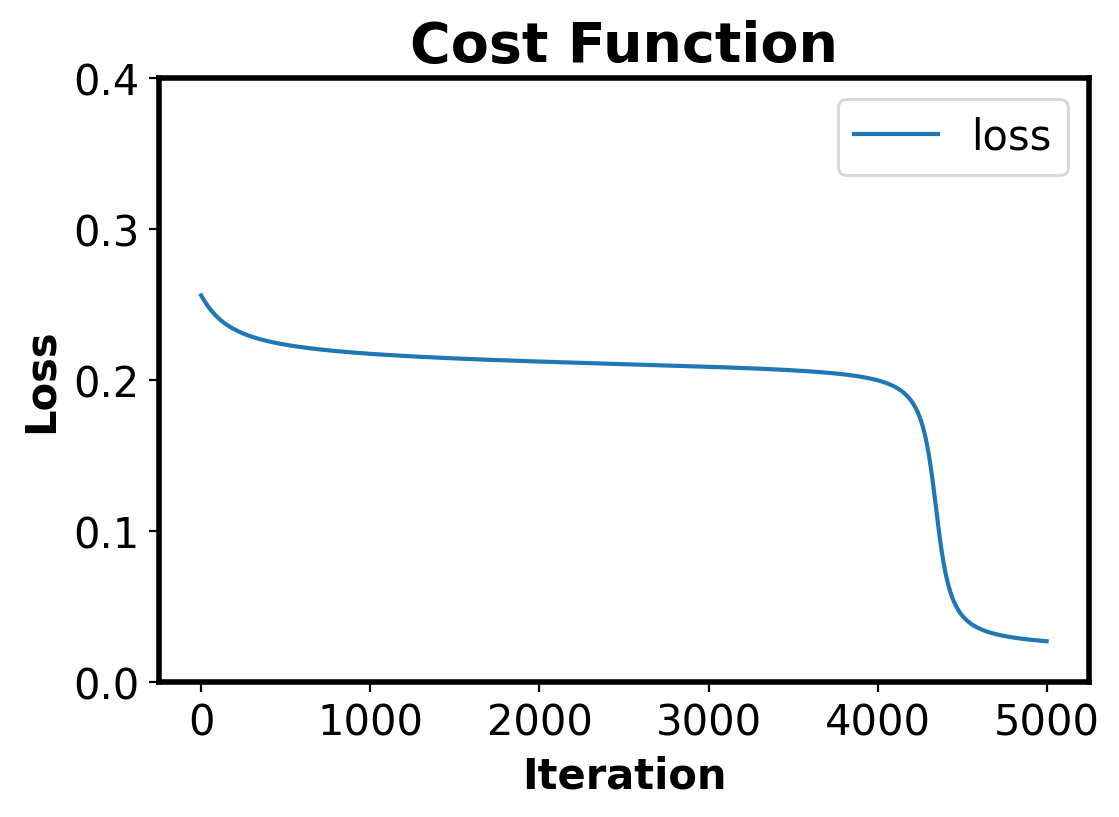

theta:  [ 0.53138964  2.28137435 -0.52779194]


In [45]:
# My approach
##################################################
theta = np.ones(X_train_a.shape[1])
# theta = np.array([0.1924853 , 0.74742297, 0.37349794])
# theta = a
##################################################

# Experiments
num_iter = 5000
threshold = 0.5      # p > threshold
beta = 1             # F1? F2?
##################################################
L = 10               # very important
##################################################
cost = []
lr = 0.01

bs = beta**2
sy = np.sum(y_train)
bs_sy = bs*sy

for i in range(num_iter):
    p = sigmoid(X_train_a,theta)
    print("p[{}]: ".format(i), p)
    yh = sigmoid_2(p)                                          # Approximation (probablility -> label)
    print("yh[{}]: ".format(i), yh)
    syh = np.sum(yh)
    syhy = np.dot(yh,y_train)
    cost.append(cost_function_new(bs,syh,syhy,bs_sy))                 # F1-Score
    print("cost[{}]: ".format(i), cost_function_new(bs,syh,syhy,bs_sy))
    gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)      # Derivative of F1-Score
#     print("gradient[{}]: ".format(i), gradient)
    theta = update_loss(theta,lr,gradient)
#     print("theta[{}]: ".format(i), theta)
#     if cost[-1] <0.1: 
#         print(i, cost[-3:-1])
#         break
#     else: continue
    
outcome_r = predict(X_train_a,theta)
print(outcome_r)
print(y_train)

plot_cost_function(cost)

print("theta: ", theta)

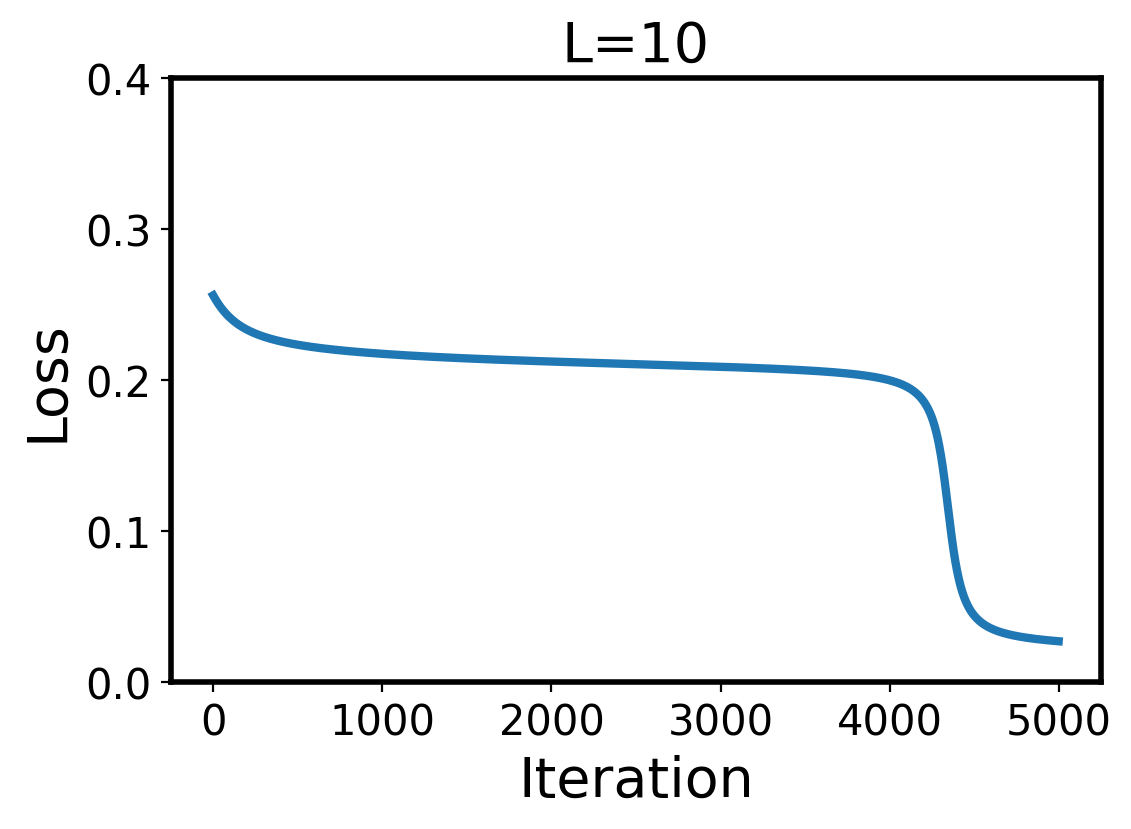

In [46]:
# plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 15

plt.plot(cost,label="loss", linewidth = 3)
plt.ylim([0, 0.4])
plt.xlabel('Iteration',fontsize = 20)
plt.ylabel('Loss',fontsize = 20)
plt.title("L=10",fontsize = 20)
# plt.legend()
plt.show() 

p[0]:  [0.97708351 0.94648782 0.7829216  0.07587461 0.39925448]
yh[0]:  [1.00000000e+00 1.00000000e+00 9.99999281e-01 6.16927549e-10
 6.44954020e-03]
cost[0]:  0.20103076950176124
p[1]:  [0.97709672 0.94647263 0.78291879 0.07584867 0.39913048]
yh[1]:  [1.00000000e+00 1.00000000e+00 9.99999281e-01 6.16127994e-10
 6.40993298e-03]
cost[1]:  0.20102444863897173
p[2]:  [0.97710985 0.94645753 0.782916   0.0758229  0.39900726]
yh[2]:  [1.00000000e+00 1.00000000e+00 9.99999281e-01 6.15334663e-10
 6.37081440e-03]
cost[2]:  0.20101820565872874
p[3]:  [0.97712288 0.94644252 0.78291322 0.0757973  0.39888482]
yh[3]:  [1.00000000e+00 1.00000000e+00 9.99999281e-01 6.14547469e-10
 6.33217546e-03]
cost[3]:  0.20101203912988153
p[4]:  [0.97713583 0.94642759 0.78291046 0.07577186 0.39876313]
yh[4]:  [1.00000000e+00 1.00000000e+00 9.99999281e-01 6.13766326e-10
 6.29400740e-03]
cost[4]:  0.2010059476560926
p[5]:  [0.97714869 0.94641276 0.78290772 0.07574659 0.3986422 ]
yh[5]:  [1.00000000e+00 1.00000000e+0

p[152]:  [0.97845868 0.94483577 0.78262025 0.07313954 0.38603579]
yh[152]:  [1.00000000e+00 1.00000000e+00 9.99999271e-01 5.38075004e-10
 3.34076078e-03]
cost[152]:  0.20053433990465486
p[153]:  [0.97846508 0.94482774 0.78261881 0.07312664 0.3859728 ]
yh[153]:  [1.00000000e+00 1.00000000e+00 9.99999271e-01 5.37728265e-10
 3.33029002e-03]
cost[153]:  0.20053266682903315
p[154]:  [0.97847145 0.94481972 0.78261737 0.0731138  0.38591001]
yh[154]:  [1.00000000e+00 1.00000000e+00 9.99999270e-01 5.37382906e-10
 3.31988574e-03]
cost[154]:  0.20053100436887372
p[155]:  [0.9784778  0.94481174 0.78261593 0.07310099 0.38584742]
yh[155]:  [1.00000000e+00 1.00000000e+00 9.99999270e-01 5.37038919e-10
 3.30954731e-03]
cost[155]:  0.20052935242315972
p[156]:  [0.97848413 0.94480378 0.7826145  0.07308823 0.38578504]
yh[156]:  [1.00000000e+00 1.00000000e+00 9.99999270e-01 5.36696293e-10
 3.29927410e-03]
cost[156]:  0.20052771089215293
p[157]:  [0.97849044 0.94479584 0.78261307 0.0730755  0.38572285]
yh[1

cost[507]:  0.20025465905001338
p[508]:  [0.97993157 0.94288928 0.78227612 0.07012563 0.37113498]
yh[508]:  [1.00000000e+00 1.00000000e+00 9.99999258e-01 4.62803495e-10
 1.58869723e-03]
cost[508]:  0.20025428894097097
p[509]:  [0.97993437 0.94288539 0.78227544 0.07011981 0.37110586]
yh[509]:  [1.00000000e+00 1.00000000e+00 9.99999258e-01 4.62668802e-10
 1.58638940e-03]
cost[509]:  0.20025391992903274
p[510]:  [0.97993717 0.94288149 0.78227477 0.07011399 0.37107678]
yh[510]:  [1.00000000e+00 1.00000000e+00 9.99999258e-01 4.62534359e-10
 1.58408841e-03]
cost[510]:  0.20025355200930328
p[511]:  [0.97993996 0.94287761 0.78227409 0.07010819 0.37104775]
yh[511]:  [1.00000000e+00 1.00000000e+00 9.99999258e-01 4.62400164e-10
 1.58179422e-03]
cost[511]:  0.20025318517691681
p[512]:  [0.97994275 0.94287373 0.78227342 0.0701024  0.37101876]
yh[512]:  [1.00000000e+00 1.00000000e+00 9.99999258e-01 4.62266216e-10
 1.57950680e-03]
cost[512]:  0.20025281942703588
p[513]:  [0.97994554 0.94286985 0.7822

cost[615]:  0.200220162164091
p[616]:  [0.98021055 0.94249738 0.78220824 0.06954426 0.36822043]
yh[616]:  [1.00000000e+00 1.00000000e+00 9.99999255e-01 4.49544116e-10
 1.37355534e-03]
cost[616]:  0.20021988722778927
p[617]:  [0.98021294 0.942494   0.78220766 0.06953928 0.36819541]
yh[617]:  [1.00000000e+00 1.00000000e+00 9.99999255e-01 4.49432198e-10
 1.37184039e-03]
cost[617]:  0.20021961299252478
p[618]:  [0.98021532 0.94249063 0.78220708 0.0695343  0.36817043]
yh[618]:  [1.00000000e+00 1.00000000e+00 9.99999255e-01 4.49320458e-10
 1.37012982e-03]
cost[618]:  0.20021933945560533
p[619]:  [0.98021769 0.94248725 0.7822065  0.06952934 0.36814547]
yh[619]:  [1.00000000e+00 1.00000000e+00 9.99999255e-01 4.49208896e-10
 1.36842359e-03]
cost[619]:  0.20021906661435318
p[620]:  [0.98022006 0.94248389 0.78220591 0.06952438 0.36812055]
yh[620]:  [1.00000000e+00 1.00000000e+00 9.99999255e-01 4.49097511e-10
 1.36672170e-03]
cost[620]:  0.20021879446610336
p[621]:  [0.98022243 0.94248052 0.782205

cost[981]:  0.20015147363116703
p[982]:  [0.98091426 0.94147268 0.78203301 0.06806214 0.3607316 ]
yh[982]:  [1.00000000e+00 1.00000000e+00 9.99999249e-01 4.17434739e-10
 9.44962257e-04]
cost[982]:  0.20015134569235904
p[983]:  [0.98091583 0.94147033 0.78203261 0.06805881 0.36071467]
yh[983]:  [1.00000000e+00 1.00000000e+00 9.99999249e-01 4.17365225e-10
 9.44163698e-04]
cost[983]:  0.20015121797478286
p[984]:  [0.9809174  0.94146799 0.78203221 0.06805548 0.36069776]
yh[984]:  [1.00000000e+00 1.00000000e+00 9.99999249e-01 4.17295786e-10
 9.43366519e-04]
cost[984]:  0.20015109047786184
p[985]:  [0.98091897 0.94146565 0.78203182 0.06805216 0.36068087]
yh[985]:  [1.00000000e+00 1.00000000e+00 9.99999249e-01 4.17226422e-10
 9.42570717e-04]
cost[985]:  0.20015096320102077
p[986]:  [0.98092053 0.94146331 0.78203142 0.06804884 0.36066399]
yh[986]:  [1.00000000e+00 1.00000000e+00 9.99999249e-01 4.17157133e-10
 9.41776287e-04]
cost[986]:  0.20015083614368723
p[987]:  [0.9809221  0.94146097 0.7820

cost[1092]:  0.20013850610927952
p[1093]:  [0.98107997 0.94122349 0.78199089 0.06770981 0.35893894]
yh[1093]:  [1.00000000e+00 1.00000000e+00 9.99999247e-01 4.10145252e-10
 8.64017560e-04]
cost[1093]:  0.20013839960440938
p[1094]:  [0.98108139 0.94122135 0.78199053 0.06770678 0.35892353]
yh[1094]:  [1.00000000e+00 1.00000000e+00 9.99999247e-01 4.10083232e-10
 8.63352703e-04]
cost[1094]:  0.20013829326731236
p[1095]:  [0.98108281 0.9412192  0.78199017 0.06770376 0.35890813]
yh[1095]:  [1.00000000e+00 1.00000000e+00 9.99999247e-01 4.10021272e-10
 8.62688893e-04]
cost[1095]:  0.20013818709759024
p[1096]:  [0.98108422 0.94121705 0.7819898  0.06770074 0.35889275]
yh[1096]:  [1.00000000e+00 1.00000000e+00 9.99999247e-01 4.09959373e-10
 8.62026126e-04]
cost[1096]:  0.20013808109484543
p[1097]:  [0.98108564 0.94121491 0.78198944 0.06769772 0.35887738]
yh[1097]:  [1.00000000e+00 1.00000000e+00 9.99999247e-01 4.09897535e-10
 8.61364402e-04]
cost[1097]:  0.20013797525868182
p[1098]:  [0.98108705 

p[1495]:  [0.9815698  0.94046827 0.78186444 0.06666061 0.35357269]
yh[1495]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.89183832e-10
 6.60821665e-04]
cost[1495]:  0.20010589931700284
p[1496]:  [0.98157085 0.94046662 0.78186417 0.06665835 0.35356106]
yh[1496]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.89139756e-10
 6.60437730e-04]
cost[1496]:  0.20010583790611192
p[1497]:  [0.9815719  0.94046497 0.78186389 0.06665608 0.35354943]
yh[1497]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.89095712e-10
 6.60054252e-04]
cost[1497]:  0.20010577656831374
p[1498]:  [0.98157295 0.94046332 0.78186362 0.06665382 0.35353782]
yh[1498]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.89051701e-10
 6.59671230e-04]
cost[1498]:  0.20010571530347676
p[1499]:  [0.981574   0.94046167 0.78186334 0.06665156 0.35352621]
yh[1499]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.89007723e-10
 6.59288664e-04]
cost[1499]:  0.2001056541114704
p[1500]:  [0.98157505 0.94046002 0.78186307 0.0666493  0

cost[1557]:  0.2001022252648441
p[1558]:  [0.98163475 0.94036597 0.78184745 0.06652061 0.35285347]
yh[1558]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.86469057e-10
 6.37494846e-04]
cost[1558]:  0.20010216814886017
p[1559]:  [0.98163576 0.94036438 0.78184719 0.06651843 0.35284227]
yh[1559]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.86426954e-10
 6.37138174e-04]
cost[1559]:  0.20010211109839138
p[1560]:  [0.98163677 0.94036278 0.78184692 0.06651626 0.35283107]
yh[1560]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.86384880e-10
 6.36781912e-04]
cost[1560]:  0.2001020541133245
p[1561]:  [0.98163778 0.94036119 0.78184666 0.06651408 0.35281989]
yh[1561]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.86342837e-10
 6.36426058e-04]
cost[1561]:  0.2001019971935466
p[1562]:  [0.98163879 0.9403596  0.7818464  0.06651191 0.35280871]
yh[1562]:  [1.00000000e+00 1.00000000e+00 9.99999242e-01 3.86300823e-10
 6.36070611e-04]
cost[1562]:  0.20010194033894446
p[1563]:  [0.9816398  0.9

cost[1951]:  0.2000838581817832
p[1952]:  [0.98199034 0.93979665 0.78175354 0.06575049 0.34888377]
yh[1952]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.71870432e-10
 5.22787981e-04]
cost[1952]:  0.20008382016275417
p[1953]:  [0.98199115 0.93979533 0.78175333 0.06574873 0.34887468]
yh[1953]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.71837733e-10
 5.22550522e-04]
cost[1953]:  0.20008378217916312
p[1954]:  [0.98199196 0.93979402 0.78175311 0.06574697 0.34886559]
yh[1954]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.71805053e-10
 5.22313284e-04]
cost[1954]:  0.20008374423096043
p[1955]:  [0.98199277 0.93979271 0.7817529  0.06574521 0.34885651]
yh[1955]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.71772392e-10
 5.22076266e-04]
cost[1955]:  0.20008370631809602
p[1956]:  [0.98199358 0.9397914  0.78175268 0.06574346 0.34884743]
yh[1956]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.71739750e-10
 5.21839470e-04]
cost[1956]:  0.2000836684405205
p[1957]:  [0.98199438 0.

cost[2045]:  0.20008043288266453
p[2046]:  [0.98206462 0.93967571 0.78173373 0.06558884 0.34804766]
yh[2046]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.68876883e-10
 5.01393883e-04]
cost[2046]:  0.20008039798876898
p[2047]:  [0.98206539 0.93967445 0.78173352 0.06558716 0.34803896]
yh[2047]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.68845880e-10
 5.01175935e-04]
cost[2047]:  0.2000803631260064
p[2048]:  [0.98206616 0.93967319 0.78173332 0.06558548 0.34803026]
yh[2048]:  [1.00000000e+00 1.00000000e+00 9.99999238e-01 3.68814894e-10
 5.00958182e-04]
cost[2048]:  0.2000803282943342
p[2049]:  [0.98206693 0.93967193 0.78173311 0.0655838  0.34802157]
yh[2049]:  [1.00000000e+00 1.00000000e+00 9.99999237e-01 3.68783925e-10
 5.00740623e-04]
cost[2049]:  0.20008029349371081
p[2050]:  [0.9820677  0.93967067 0.78173291 0.06558212 0.34801288]
yh[2050]:  [1.00000000e+00 1.00000000e+00 9.99999237e-01 3.68752974e-10
 5.00523257e-04]
cost[2050]:  0.2000802587240944
p[2051]:  [0.98206847 0.9

cost[2422]:  0.2000691664339409
p[2423]:  [0.98233164 0.93923494 0.78166195 0.06500536 0.34502148]
yh[2423]:  [1.00000000e+00 1.00000000e+00 9.99999235e-01 3.58270727e-10
 4.31019585e-04]
cost[2423]:  0.2000691408564732
p[2424]:  [0.9823323  0.93923386 0.78166178 0.06500393 0.34501406]
yh[2424]:  [1.00000000e+00 1.00000000e+00 9.99999235e-01 3.58245160e-10
 4.30859810e-04]
cost[2424]:  0.20006911529848026
p[2425]:  [0.98233295 0.93923277 0.7816616  0.0650025  0.34500665]
yh[2425]:  [1.00000000e+00 1.00000000e+00 9.99999235e-01 3.58219605e-10
 4.30700156e-04]
cost[2425]:  0.20006908975993964
p[2426]:  [0.9823336  0.93923169 0.78166143 0.06500108 0.34499924]
yh[2426]:  [1.00000000e+00 1.00000000e+00 9.99999235e-01 3.58194062e-10
 4.30540624e-04]
cost[2426]:  0.20006906424082915
p[2427]:  [0.98233425 0.9392306  0.78166125 0.06499965 0.34499183]
yh[2427]:  [1.00000000e+00 1.00000000e+00 9.99999235e-01 3.58168532e-10
 4.30381214e-04]
cost[2427]:  0.20006903874112658
p[2428]:  [0.9823349  0.

cost[2502]:  0.20006717998978318
p[2503]:  [0.9823829  0.93914926 0.78164808 0.06489295 0.34443699]
yh[2503]:  [1.00000000e+00 1.00000000e+00 9.99999234e-01 3.56262705e-10
 4.18610718e-04]
cost[2503]:  0.20006715590225777
p[2504]:  [0.98238353 0.9391482  0.78164791 0.06489156 0.3444298 ]
yh[2504]:  [1.00000000e+00 1.00000000e+00 9.99999234e-01 3.56238072e-10
 4.18460248e-04]
cost[2504]:  0.20006713183251912
p[2505]:  [0.98238416 0.93914715 0.78164774 0.06489018 0.34442261]
yh[2505]:  [1.00000000e+00 1.00000000e+00 9.99999234e-01 3.56213451e-10
 4.18309888e-04]
cost[2505]:  0.20006710778054737
p[2506]:  [0.98238479 0.93914609 0.78164757 0.0648888  0.34441542]
yh[2506]:  [1.00000000e+00 1.00000000e+00 9.99999234e-01 3.56188841e-10
 4.18159639e-04]
cost[2506]:  0.20006708374632298
p[2507]:  [0.98238542 0.93914504 0.78164739 0.06488742 0.34440823]
yh[2507]:  [1.00000000e+00 1.00000000e+00 9.99999234e-01 3.56164243e-10
 4.18009501e-04]
cost[2507]:  0.20006705972982564
p[2508]:  [0.98238605 

cost[2893]:  0.2000589465847178
p[2894]:  [0.98261165 0.93876248 0.78158577 0.0643896  0.34181395]
yh[2894]:  [1.00000000e+00 1.00000000e+00 9.99999232e-01 3.47408496e-10
 3.67175841e-04]
cost[2894]:  0.20005892818668358
p[2895]:  [0.98261219 0.93876155 0.78158562 0.0643884  0.34180769]
yh[2895]:  [1.00000000e+00 1.00000000e+00 9.99999232e-01 3.47387656e-10
 3.67060901e-04]
cost[2895]:  0.20005890980048768
p[2896]:  [0.98261274 0.93876062 0.78158547 0.0643872  0.34180143]
yh[2896]:  [1.00000000e+00 1.00000000e+00 9.99999232e-01 3.47366823e-10
 3.66946036e-04]
cost[2896]:  0.20005889142611888
p[2897]:  [0.98261328 0.9387597  0.78158532 0.06438601 0.34179517]
yh[2897]:  [1.00000000e+00 1.00000000e+00 9.99999232e-01 3.47345999e-10
 3.66831245e-04]
cost[2897]:  0.20005887306356585
p[2898]:  [0.98261382 0.93875877 0.78158517 0.06438481 0.34178891]
yh[2898]:  [1.00000000e+00 1.00000000e+00 9.99999232e-01 3.47325183e-10
 3.66716527e-04]
cost[2898]:  0.2000588547128166
p[2899]:  [0.98261437 0.

cost[2965]:  0.20005765151417598
p[2966]:  [0.98265032 0.93869638 0.78157517 0.06430424 0.34136816]
yh[2966]:  [1.00000000e+00 1.00000000e+00 9.99999231e-01 3.45928872e-10
 3.59085015e-04]
cost[2966]:  0.2000576339399669
p[2967]:  [0.98265085 0.93869547 0.78157502 0.06430307 0.34136204]
yh[2967]:  [1.00000000e+00 1.00000000e+00 9.99999231e-01 3.45908615e-10
 3.58975221e-04]
cost[2967]:  0.2000576163768043
p[2968]:  [0.98265138 0.93869456 0.78157488 0.0643019  0.34135592]
yh[2968]:  [1.00000000e+00 1.00000000e+00 9.99999231e-01 3.45888366e-10
 3.58865496e-04]
cost[2968]:  0.2000575988246781
p[2969]:  [0.98265191 0.93869365 0.78157473 0.06430073 0.34134981]
yh[2969]:  [1.00000000e+00 1.00000000e+00 9.99999231e-01 3.45868125e-10
 3.58755840e-04]
cost[2969]:  0.20005758128357742
p[2970]:  [0.98265244 0.93869275 0.78157459 0.06429956 0.34134369]
yh[2970]:  [1.00000000e+00 1.00000000e+00 9.99999231e-01 3.45847892e-10
 3.58646253e-04]
cost[2970]:  0.20005756375349226
p[2971]:  [0.98265297 0.9

cost[3362]:  0.20005144639053396
p[3363]:  [0.98284768 0.93835575 0.78152082 0.06386739 0.33908246]
yh[3363]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.38454859e-10
 3.20317599e-04]
cost[3363]:  0.20005143249638024
p[3364]:  [0.98284815 0.93835494 0.7815207  0.06386636 0.33907703]
yh[3364]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.38437349e-10
 3.20230790e-04]
cost[3364]:  0.20005141860997155
p[3365]:  [0.98284862 0.93835413 0.78152057 0.06386532 0.33907161]
yh[3365]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.38419845e-10
 3.20144030e-04]
cost[3365]:  0.20005140473130179
p[3366]:  [0.98284908 0.93835332 0.78152044 0.06386429 0.33906619]
yh[3366]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.38402346e-10
 3.20057318e-04]
cost[3366]:  0.20005139086036372
p[3367]:  [0.98284955 0.93835251 0.78152031 0.06386326 0.33906078]
yh[3367]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.38384854e-10
 3.19970654e-04]
cost[3367]:  0.20005137699715136
p[3368]:  [0.98285001 

cost[3449]:  0.20005026589795638
p[3450]:  [0.98288774 0.93828595 0.78150974 0.06377849 0.33861641]
yh[3450]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.36953698e-10
 3.12942011e-04]
cost[3450]:  0.20005025265397425
p[3451]:  [0.98288819 0.93828515 0.78150961 0.06377748 0.33861112]
yh[3451]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.36936700e-10
 3.12859263e-04]
cost[3451]:  0.20005023941719602
p[3452]:  [0.98288865 0.93828436 0.78150949 0.06377647 0.33860583]
yh[3452]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.36919708e-10
 3.12776561e-04]
cost[3452]:  0.2000502261876158
p[3453]:  [0.9828891  0.93828357 0.78150936 0.06377546 0.33860054]
yh[3453]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.36902722e-10
 3.12693903e-04]
cost[3453]:  0.20005021296522774
p[3454]:  [0.98288955 0.93828278 0.78150924 0.06377445 0.33859525]
yh[3454]:  [1.00000000e+00 1.00000000e+00 9.99999229e-01 3.36885741e-10
 3.12611291e-04]
cost[3454]:  0.2000501997500257
p[3455]:  [0.98289001 0.

cost[3837]:  0.20004561636068907
p[3838]:  [0.98305456 0.9379927  0.78146338 0.06340729 0.3366673 ]
yh[3838]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.30757516e-10
 2.83891298e-04]
cost[3838]:  0.20004560552275008
p[3839]:  [0.98305497 0.93799198 0.78146327 0.06340638 0.33666252]
yh[3839]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.30742504e-10
 2.83823580e-04]
cost[3839]:  0.20004559469013194
p[3840]:  [0.98305537 0.93799126 0.78146315 0.06340547 0.33665775]
yh[3840]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.30727498e-10
 2.83755895e-04]
cost[3840]:  0.20004558386283022
p[3841]:  [0.98305578 0.93799054 0.78146304 0.06340457 0.33665298]
yh[3841]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.30712495e-10
 2.83688243e-04]
cost[3841]:  0.20004557304084125
p[3842]:  [0.98305619 0.93798982 0.78146293 0.06340366 0.33664821]
yh[3842]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.30697498e-10
 2.83620625e-04]
cost[3842]:  0.20004556222416103
p[3843]:  [0.98305659 

cost[3920]:  0.20004473456200966
p[3921]:  [0.98308798 0.93793346 0.78145405 0.06333274 0.33627521]
yh[3921]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.29526890e-10
 2.78381576e-04]
cost[3921]:  0.20004472415259533
p[3922]:  [0.98308838 0.93793275 0.78145394 0.06333185 0.33627054]
yh[3922]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.29512249e-10
 2.78316535e-04]
cost[3922]:  0.20004471374818655
p[3923]:  [0.98308878 0.93793205 0.78145383 0.06333096 0.33626586]
yh[3923]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.29497613e-10
 2.78251525e-04]
cost[3923]:  0.20004470334878022
p[3924]:  [0.98308918 0.93793134 0.78145372 0.06333007 0.33626119]
yh[3924]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.29482981e-10
 2.78186546e-04]
cost[3924]:  0.20004469295437233
p[3925]:  [0.98308958 0.93793063 0.78145361 0.06332918 0.33625652]
yh[3925]:  [1.00000000e+00 1.00000000e+00 9.99999227e-01 3.29468353e-10
 2.78121599e-04]
cost[3925]:  0.20004468256495955
p[3926]:  [0.98308997 

cost[4307]:  0.2000410481085403
p[4308]:  [0.98323475 0.93767134 0.78141296 0.06300467 0.33454736]
yh[4308]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.24165710e-10
 2.55347005e-04]
cost[4308]:  0.20004103939495665
p[4309]:  [0.98323511 0.93767069 0.78141286 0.06300387 0.3345431 ]
yh[4309]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.24152597e-10
 2.55292557e-04]
cost[4309]:  0.20004103068519885
p[4310]:  [0.98323548 0.93767004 0.78141276 0.06300306 0.33453883]
yh[4310]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.24139488e-10
 2.55238134e-04]
cost[4310]:  0.2000410219792641
p[4311]:  [0.98323584 0.9376694  0.78141265 0.06300225 0.33453457]
yh[4311]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.24126382e-10
 2.55183734e-04]
cost[4311]:  0.20004101327715018
p[4312]:  [0.9832362  0.93766875 0.78141255 0.06300144 0.33453031]
yh[4312]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.24113280e-10
 2.55129358e-04]
cost[4312]:  0.20004100457885432
p[4313]:  [0.98323656 0.

cost[4418]:  0.20004010370710634
p[4419]:  [0.98327434 0.93760009 0.78140184 0.062916   0.33407961]
yh[4419]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.22731560e-10
 2.49445816e-04]
cost[4419]:  0.20004009540316803
p[4420]:  [0.98327469 0.93759946 0.78140174 0.06291521 0.33407545]
yh[4420]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.22718832e-10
 2.49393928e-04]
cost[4420]:  0.20004008710278698
p[4421]:  [0.98327504 0.93759882 0.78140164 0.06291442 0.33407129]
yh[4421]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.22706108e-10
 2.49342062e-04]
cost[4421]:  0.20004007880596053
p[4422]:  [0.98327539 0.93759819 0.78140154 0.06291363 0.33406713]
yh[4422]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.22693387e-10
 2.49290218e-04]
cost[4422]:  0.2000400705126869
p[4423]:  [0.98327575 0.93759756 0.78140144 0.06291284 0.33406297]
yh[4423]:  [1.00000000e+00 1.00000000e+00 9.99999225e-01 3.22680670e-10
 2.49238396e-04]
cost[4423]:  0.20004006222296322
p[4424]:  [0.9832761  0

cost[4788]:  0.20003725620975266
p[4789]:  [0.98339922 0.93737376 0.78136664 0.0626357  0.33259919]
yh[4789]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.18240082e-10
 2.31652542e-04]
cost[4789]:  0.20003724907990172
p[4790]:  [0.98339954 0.93737318 0.78136655 0.06263497 0.33259535]
yh[4790]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.18228502e-10
 2.31607989e-04]
cost[4790]:  0.20003724195287553
p[4791]:  [0.98339986 0.93737259 0.78136646 0.06263424 0.3325915 ]
yh[4791]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.18216924e-10
 2.31563453e-04]
cost[4791]:  0.20003723482867253
p[4792]:  [0.98340019 0.937372   0.78136636 0.06263352 0.33258765]
yh[4792]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.18205349e-10
 2.31518935e-04]
cost[4792]:  0.20003722770729127
p[4793]:  [0.98340051 0.93737141 0.78136627 0.06263279 0.33258381]
yh[4793]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.18193777e-10
 2.31474435e-04]
cost[4793]:  0.20003722058872941
p[4794]:  [0.98340083 

p[4865]:  [0.98342362 0.93732925 0.78135974 0.06258082 0.33230897]
yh[4865]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.17367970e-10
 2.28316054e-04]
cost[4865]:  0.20003671535488132
p[4866]:  [0.98342394 0.93732867 0.78135965 0.0625801  0.33230518]
yh[4866]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.17356602e-10
 2.28272812e-04]
cost[4866]:  0.20003670843769294
p[4867]:  [0.98342426 0.93732808 0.78135956 0.06257938 0.3323014 ]
yh[4867]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.17345236e-10
 2.28229587e-04]
cost[4867]:  0.20003670152320296
p[4868]:  [0.98342458 0.9373275  0.78135947 0.06257867 0.33229761]
yh[4868]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.17333873e-10
 2.28186379e-04]
cost[4868]:  0.20003669461140994
p[4869]:  [0.9834249  0.93732692 0.78135938 0.06257795 0.33229382]
yh[4869]:  [1.00000000e+00 1.00000000e+00 9.99999223e-01 3.17322514e-10
 2.28143188e-04]
cost[4869]:  0.2000366877023122
p[4870]:  [0.98342522 0.93732634 0.78135929 0.06257723 0

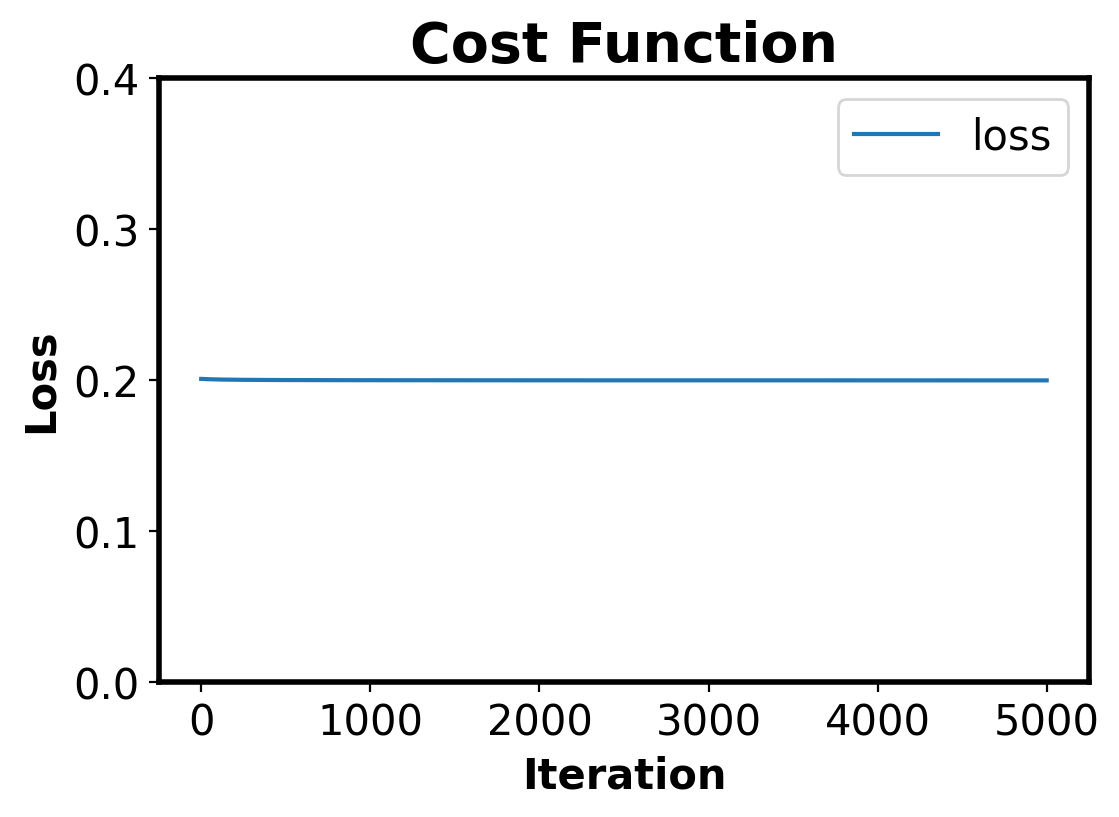

theta:  [0.93093762 1.12163403 0.97577725]


In [47]:
# My approach
##################################################
theta = np.ones(X_train_a.shape[1])
# theta = np.array([0.1924853 , 0.74742297, 0.37349794])
# theta = a
##################################################

# Experiments
num_iter = 5000
threshold = 0.5      # p > threshold
beta = 1             # F1? F2?
##################################################
L = 50               # very important
##################################################
cost = []
lr = 0.01

bs = beta**2
sy = np.sum(y_train)
bs_sy = bs*sy

for i in range(num_iter):
    p = sigmoid(X_train_a,theta)
    print("p[{}]: ".format(i), p)
    yh = sigmoid_2(p)                                          # Approximation (probablility -> label)
    print("yh[{}]: ".format(i), yh)
    syh = np.sum(yh)
    syhy = np.dot(yh,y_train)
    cost.append(cost_function_new(bs,syh,syhy,bs_sy))                 # F1-Score
    print("cost[{}]: ".format(i), cost_function_new(bs,syh,syhy,bs_sy))
    gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)      # Derivative of F1-Score
#     print("gradient[{}]: ".format(i), gradient)
    theta = update_loss(theta,lr,gradient)
#     print("theta[{}]: ".format(i), theta)
#     if cost[-1] <0.1: 
#         print(i, cost[-3:-1])
#         break
#     else: continue
    
outcome_r = predict(X_train_a,theta)
print(outcome_r)
print(y_train)

plot_cost_function(cost)

print("theta: ", theta)

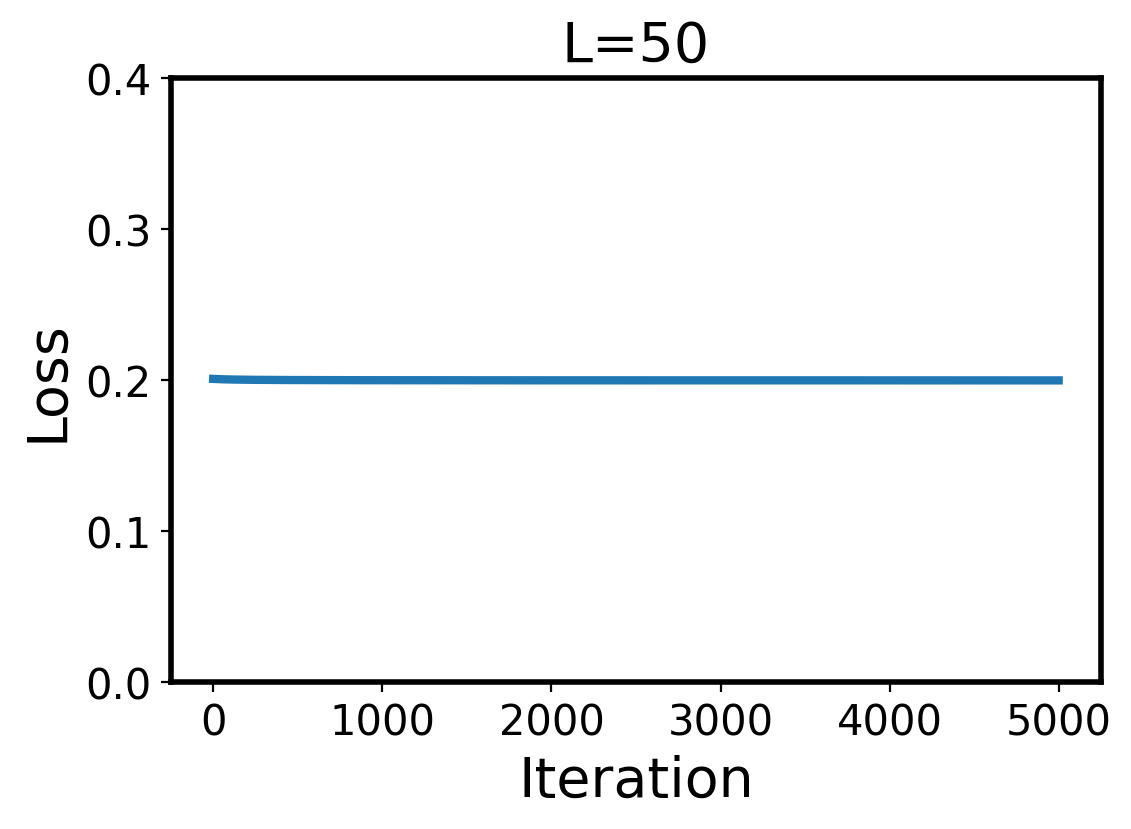

In [48]:
# plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['font.size'] = 15

plt.plot(cost,label="loss", linewidth = 3)
plt.ylim([0, 0.4])
plt.xlabel('Iteration',fontsize = 20)
plt.ylabel('Loss',fontsize = 20)
plt.title("L=50",fontsize = 20)
# plt.legend()
plt.show() 